### Import Lib

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib as mpl

In [2]:
df = pd.read_csv('../dataset/Raw.csv')

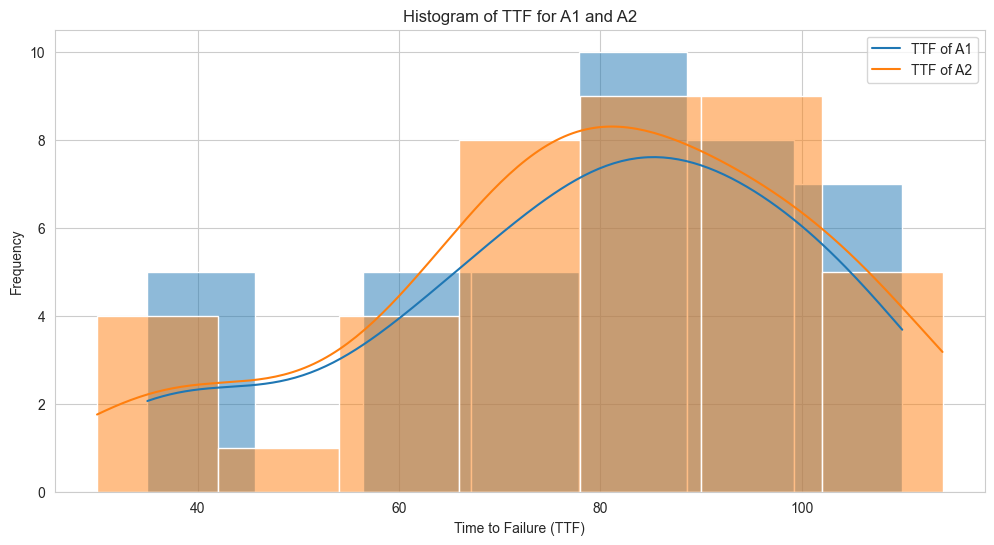

In [3]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.histplot(data=df, x="TTF of A1", kde=True)
sns.histplot(data=df, x="TTF of A2", kde=True)

plt.legend(["TTF of A1", "TTF of A2"])
plt.title("Histogram of TTF for A1 and A2")
plt.xlabel("Time to Failure (TTF)")
plt.ylabel("Frequency")
plt.show()

## Bootstrapping process

In [23]:
N_array = [15,20,30]
def random_sample(data, n,random_num):
    for i in range(random_num):
        samples = df.sample(n)
        samples.to_csv(f'bootstrapping_data/sample_{n}/sampled_data_{i+1}.csv', index=False)

In [ ]:
for N in N_array:
    random_sample(df, N, 30)

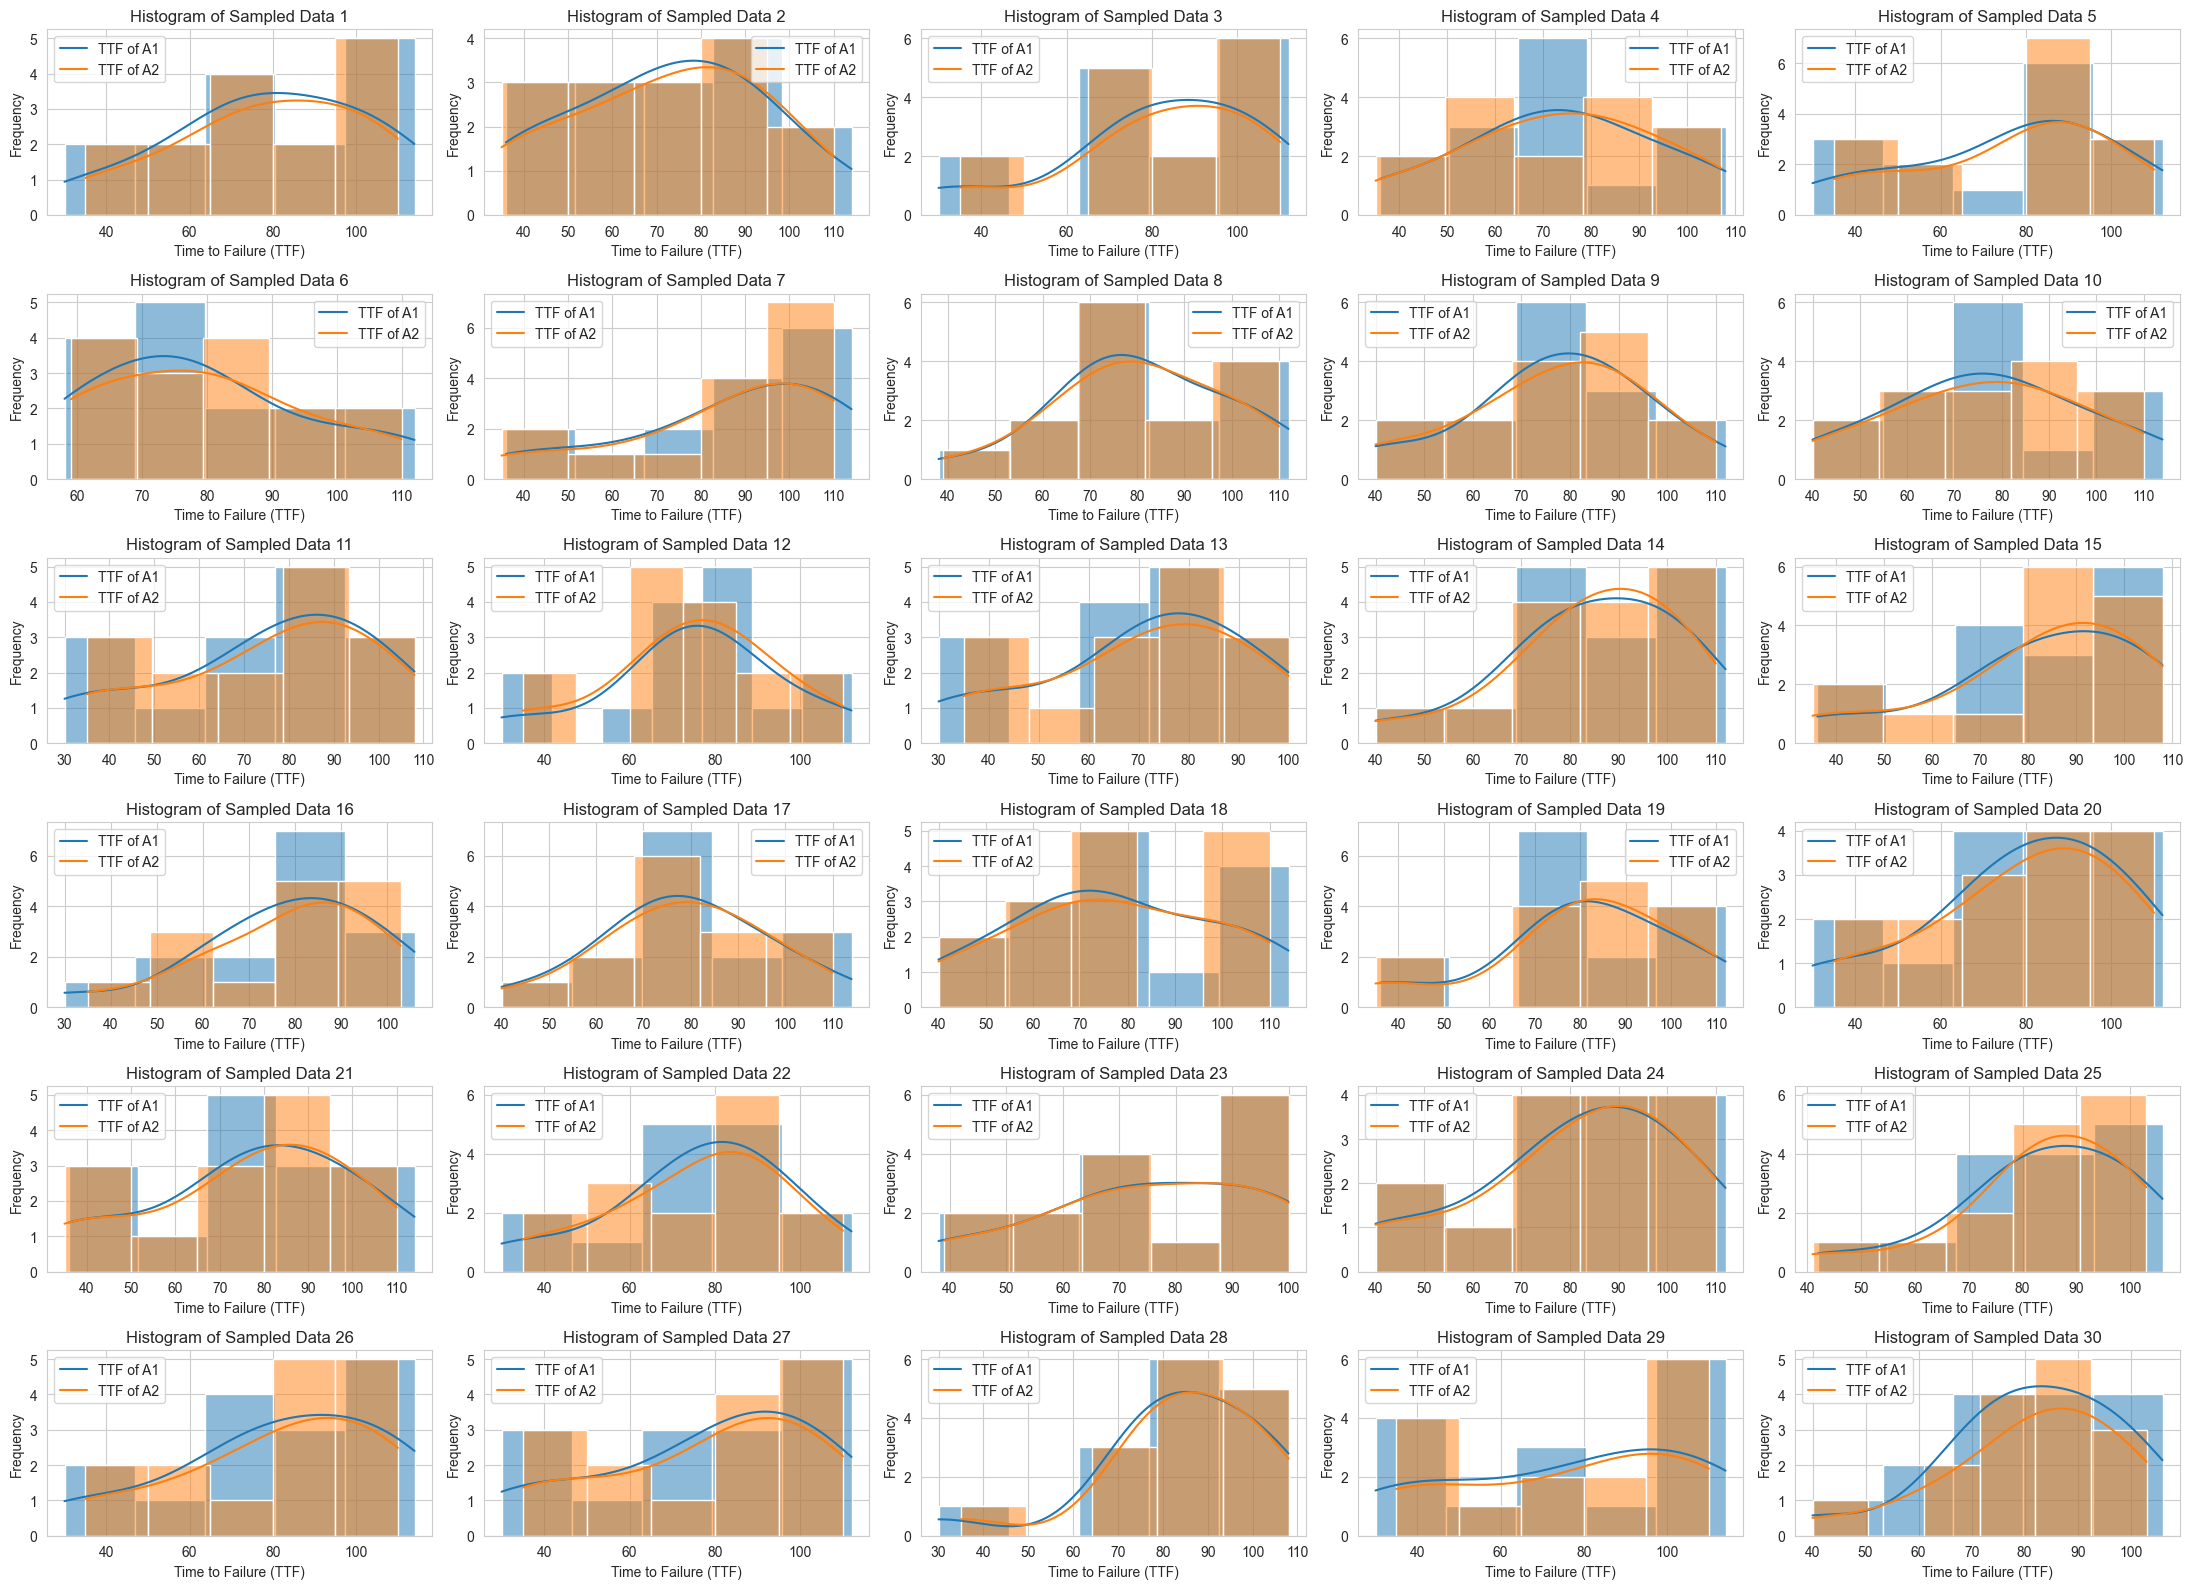

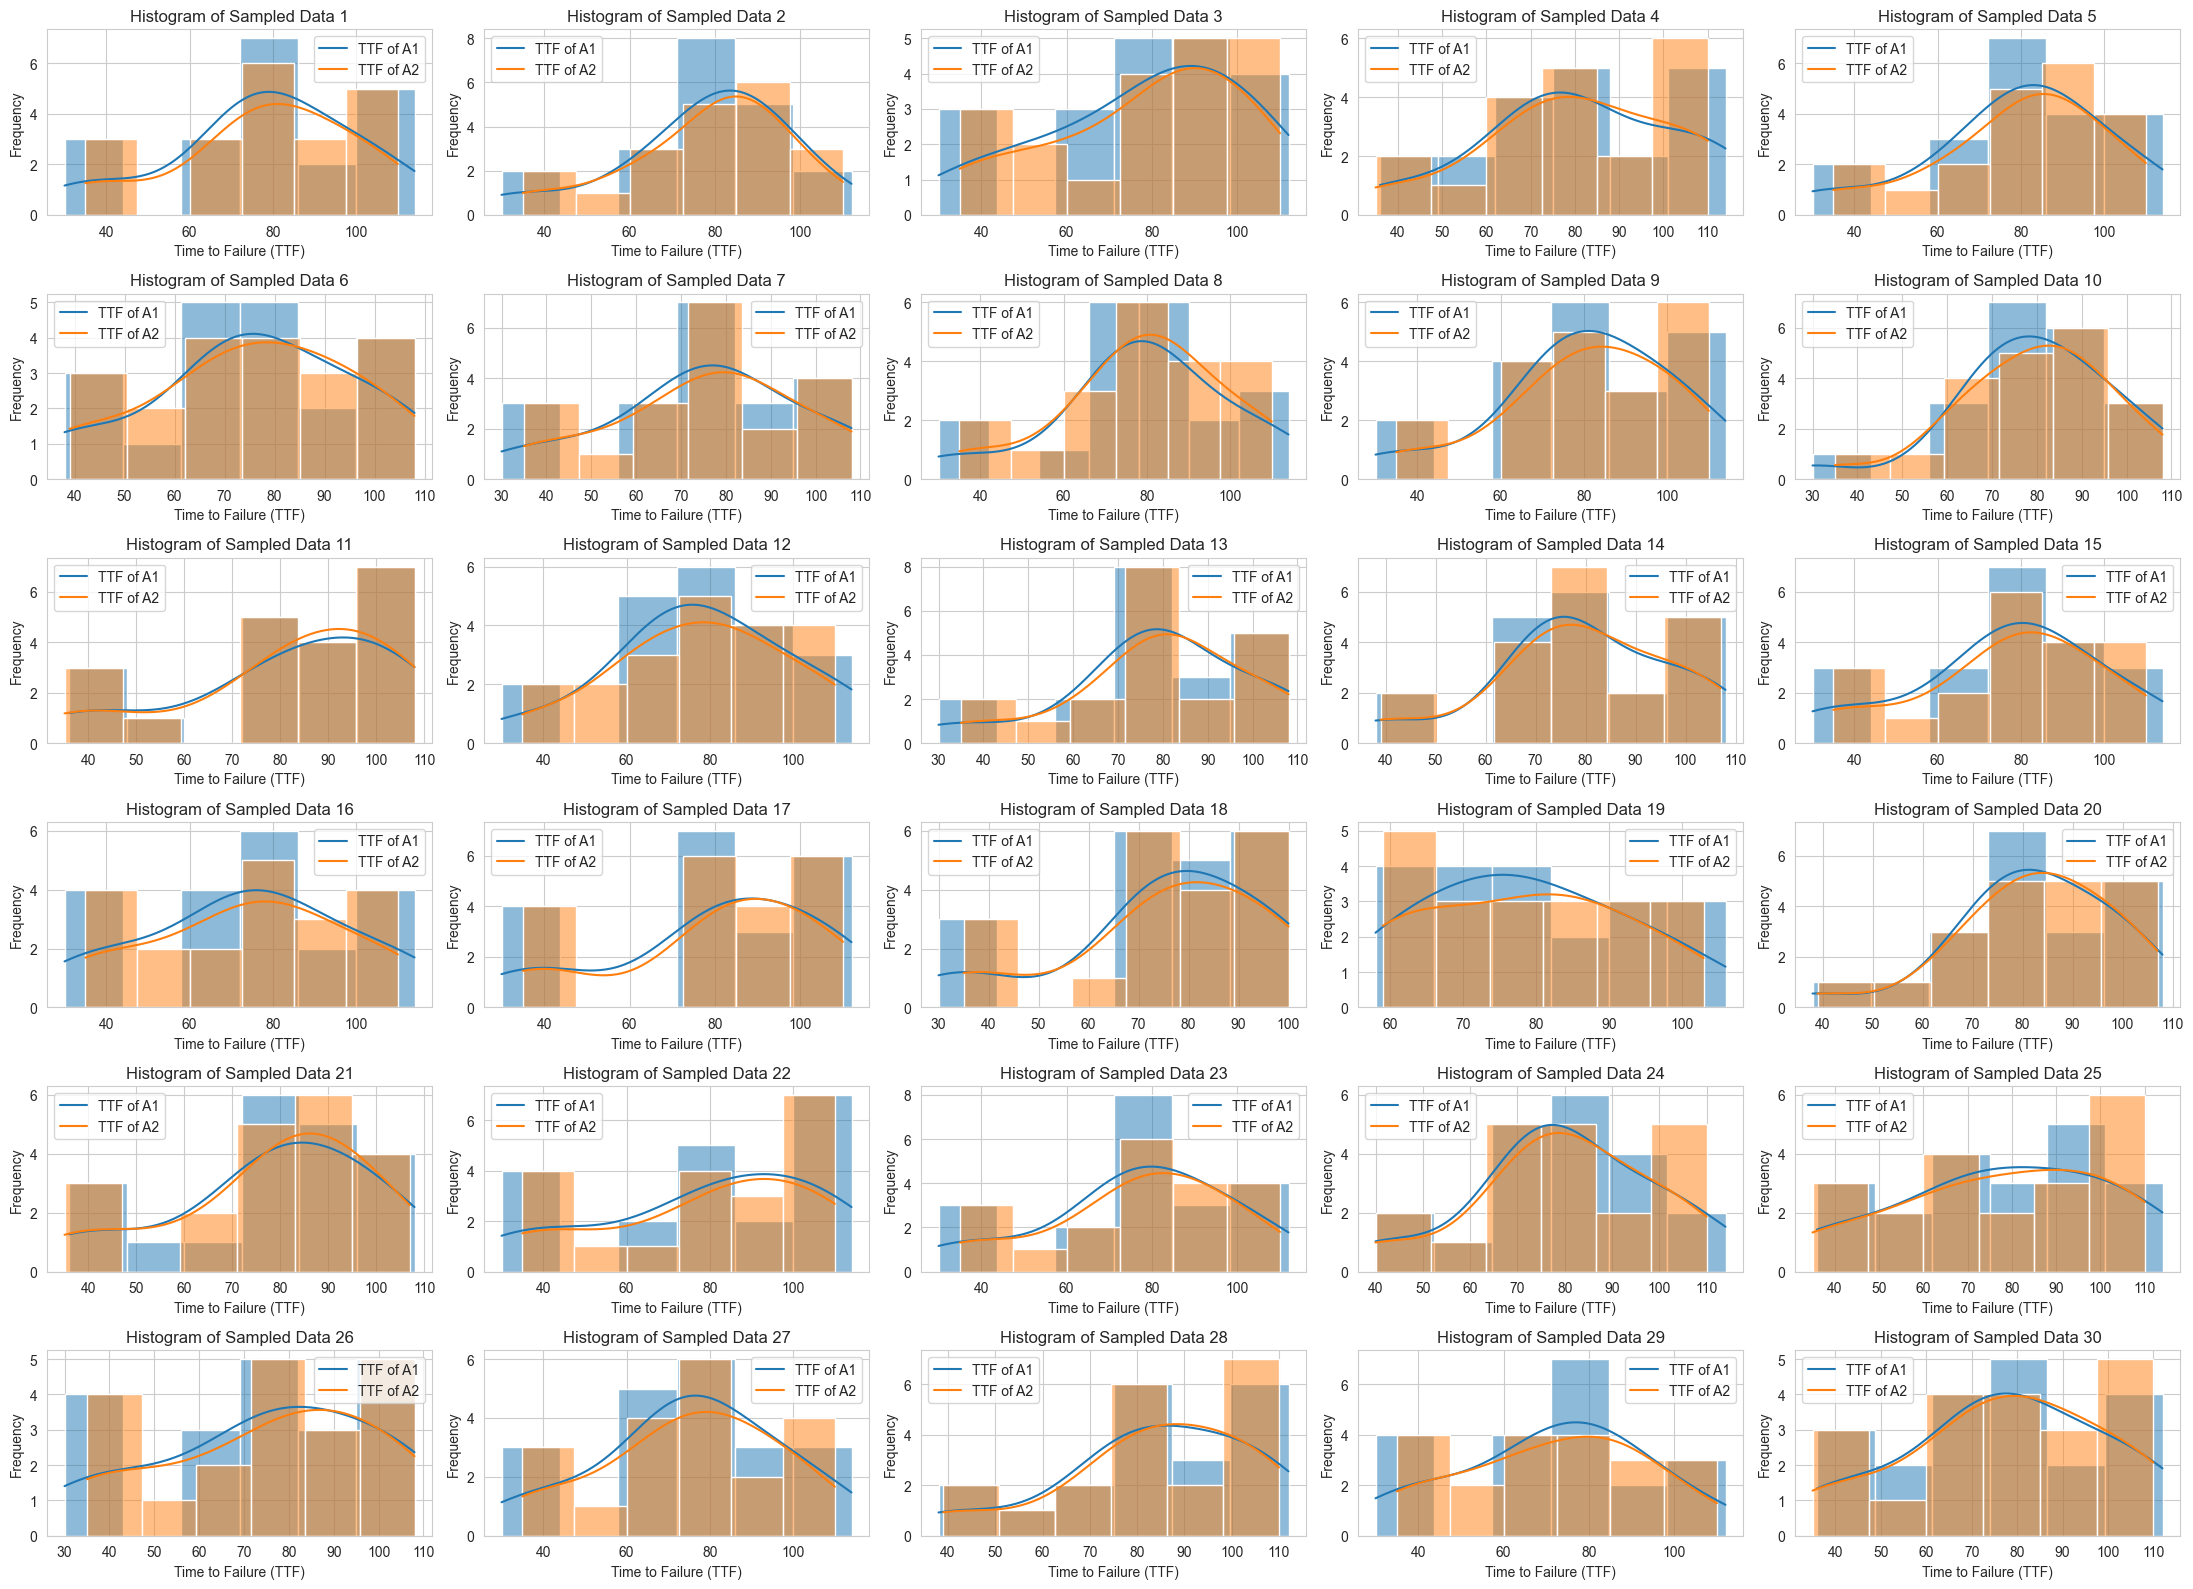

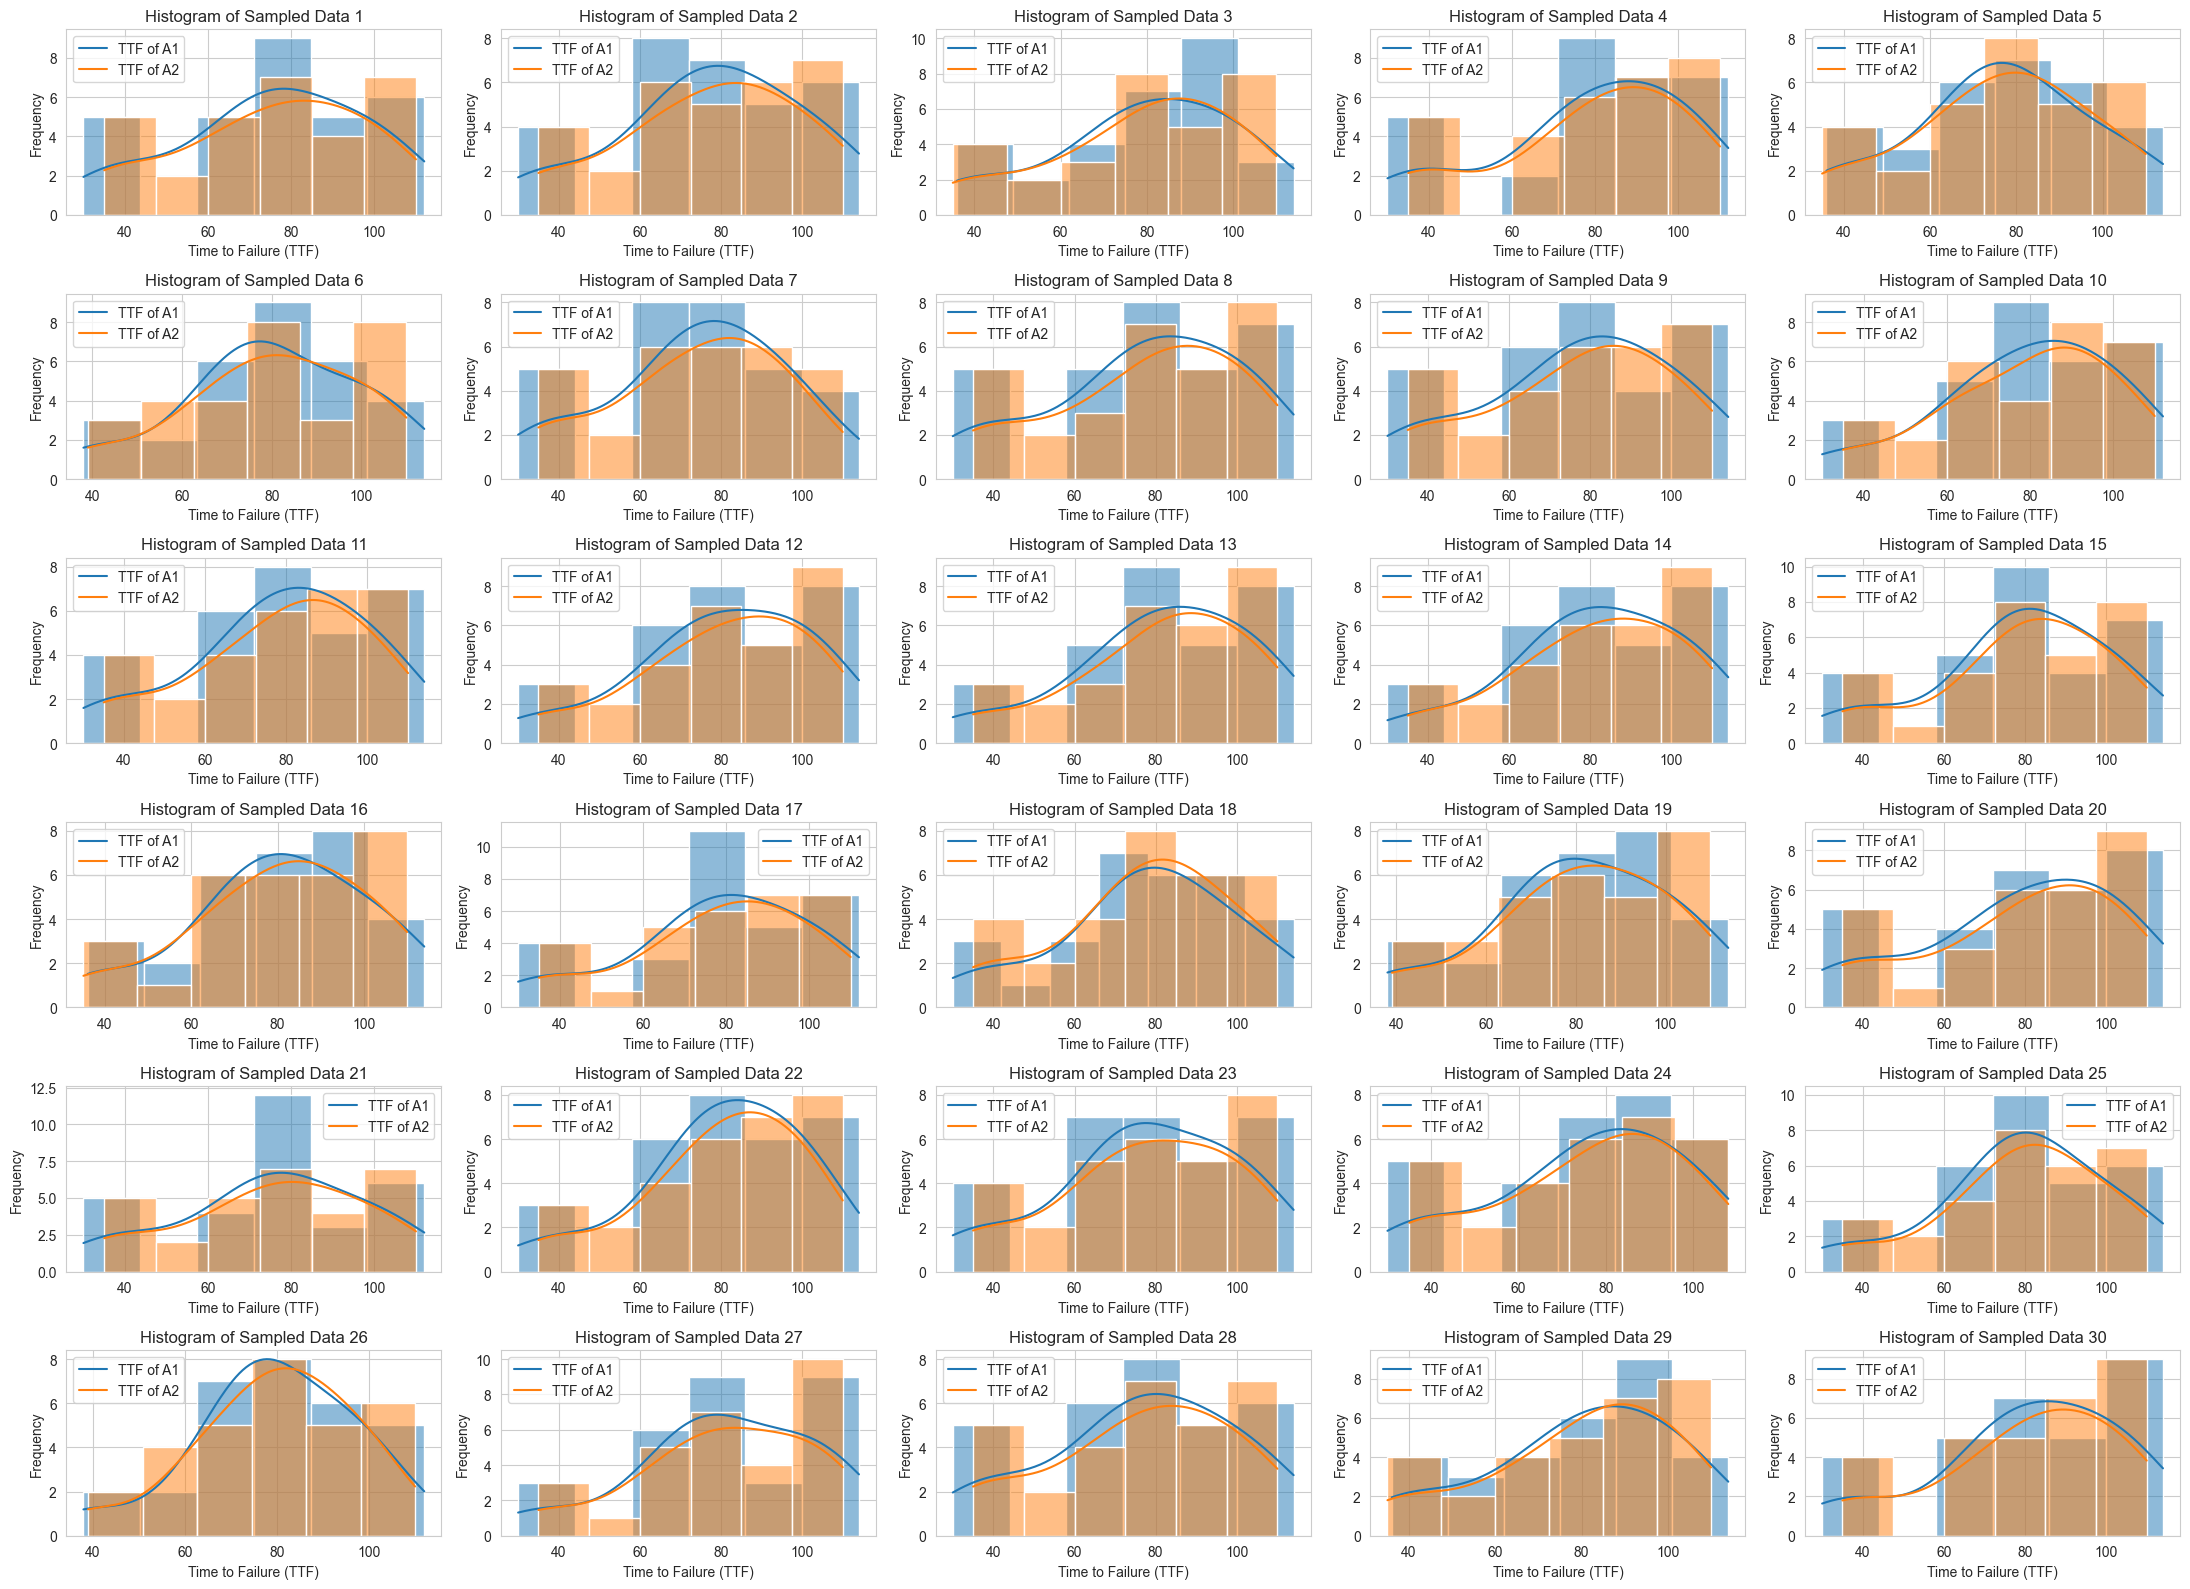

In [24]:
for N in N_array:
    plt.figure(figsize=(22, 16))
    sns.set_style("whitegrid")
    for i in range(1,31):
        df_test = pd.read_csv(f'../bootstrapping_data/sample_{N}/sampled_data_{i}.csv')
        plt.subplot(6, 5, i)
        plt.title(f'Histogram of Sampled Data {i}')
        sns.histplot(data=df_test, x="TTF of A1", kde=True)
        sns.histplot(data=df_test, x="TTF of A2", kde=True)
        plt.legend(["TTF of A1", "TTF of A2"])
        plt.xlabel("Time to Failure (TTF)")
        plt.ylabel("Frequency")
    plt.tight_layout()
    # plt.savefig(f'dataset/Fig/histogram_sample_{N}.png')
    plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


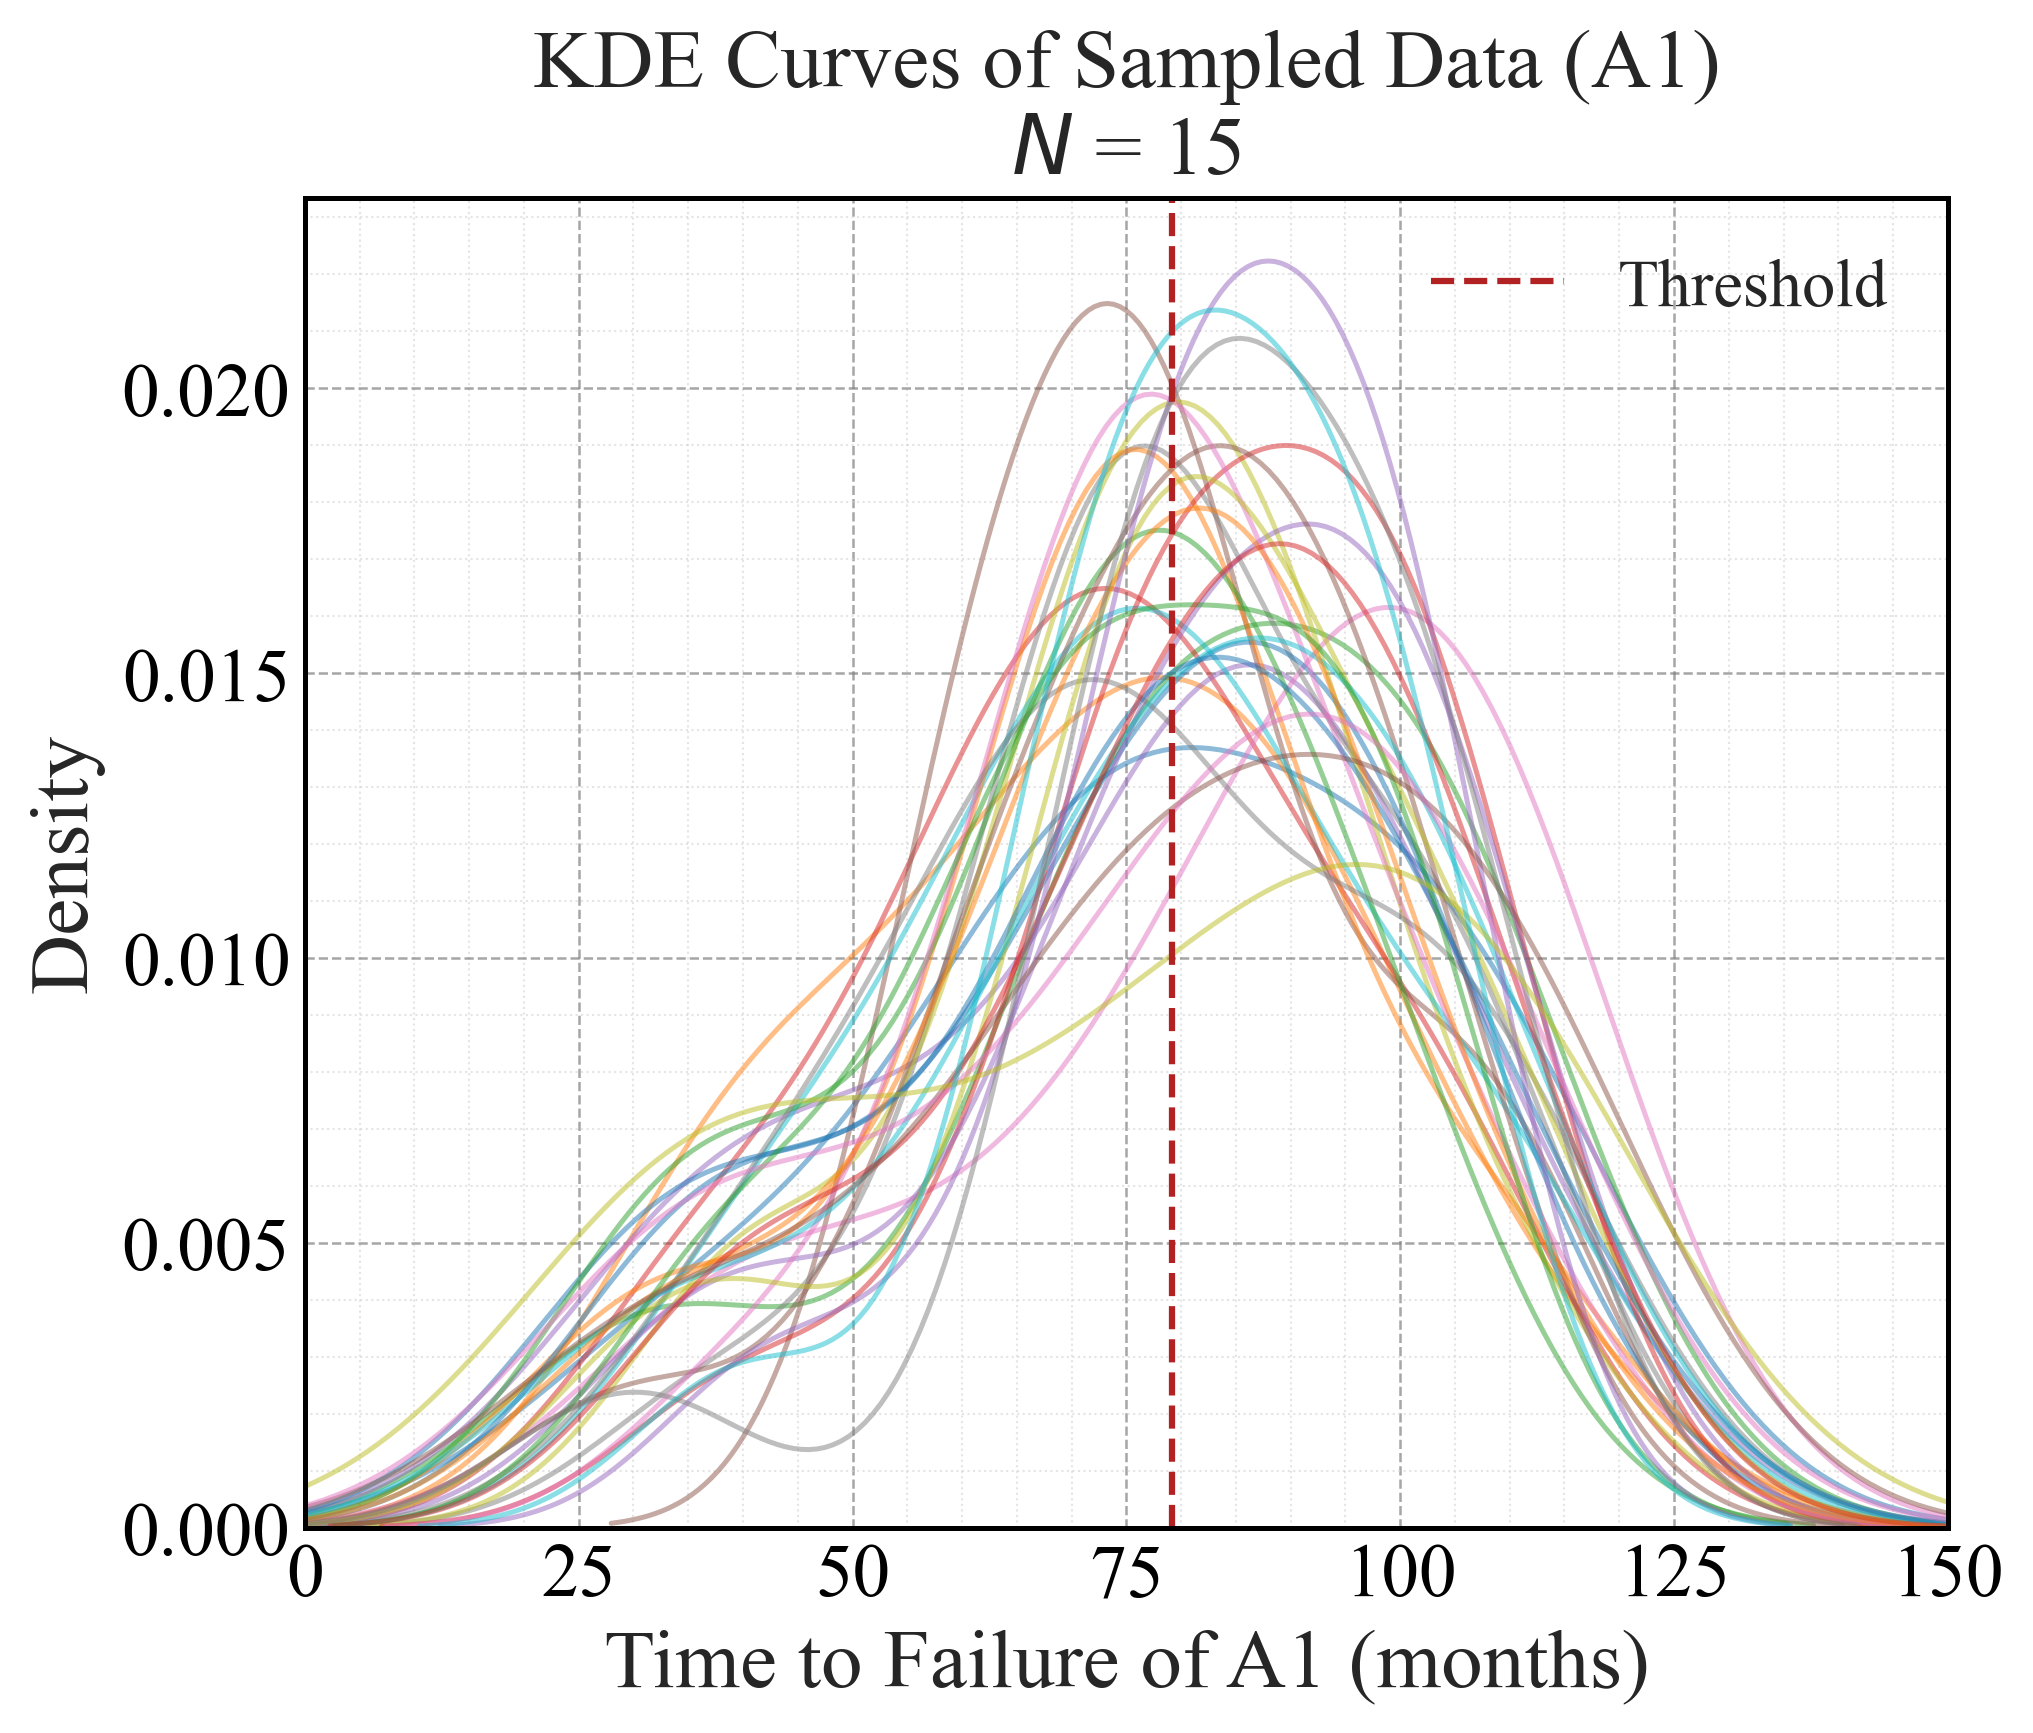

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


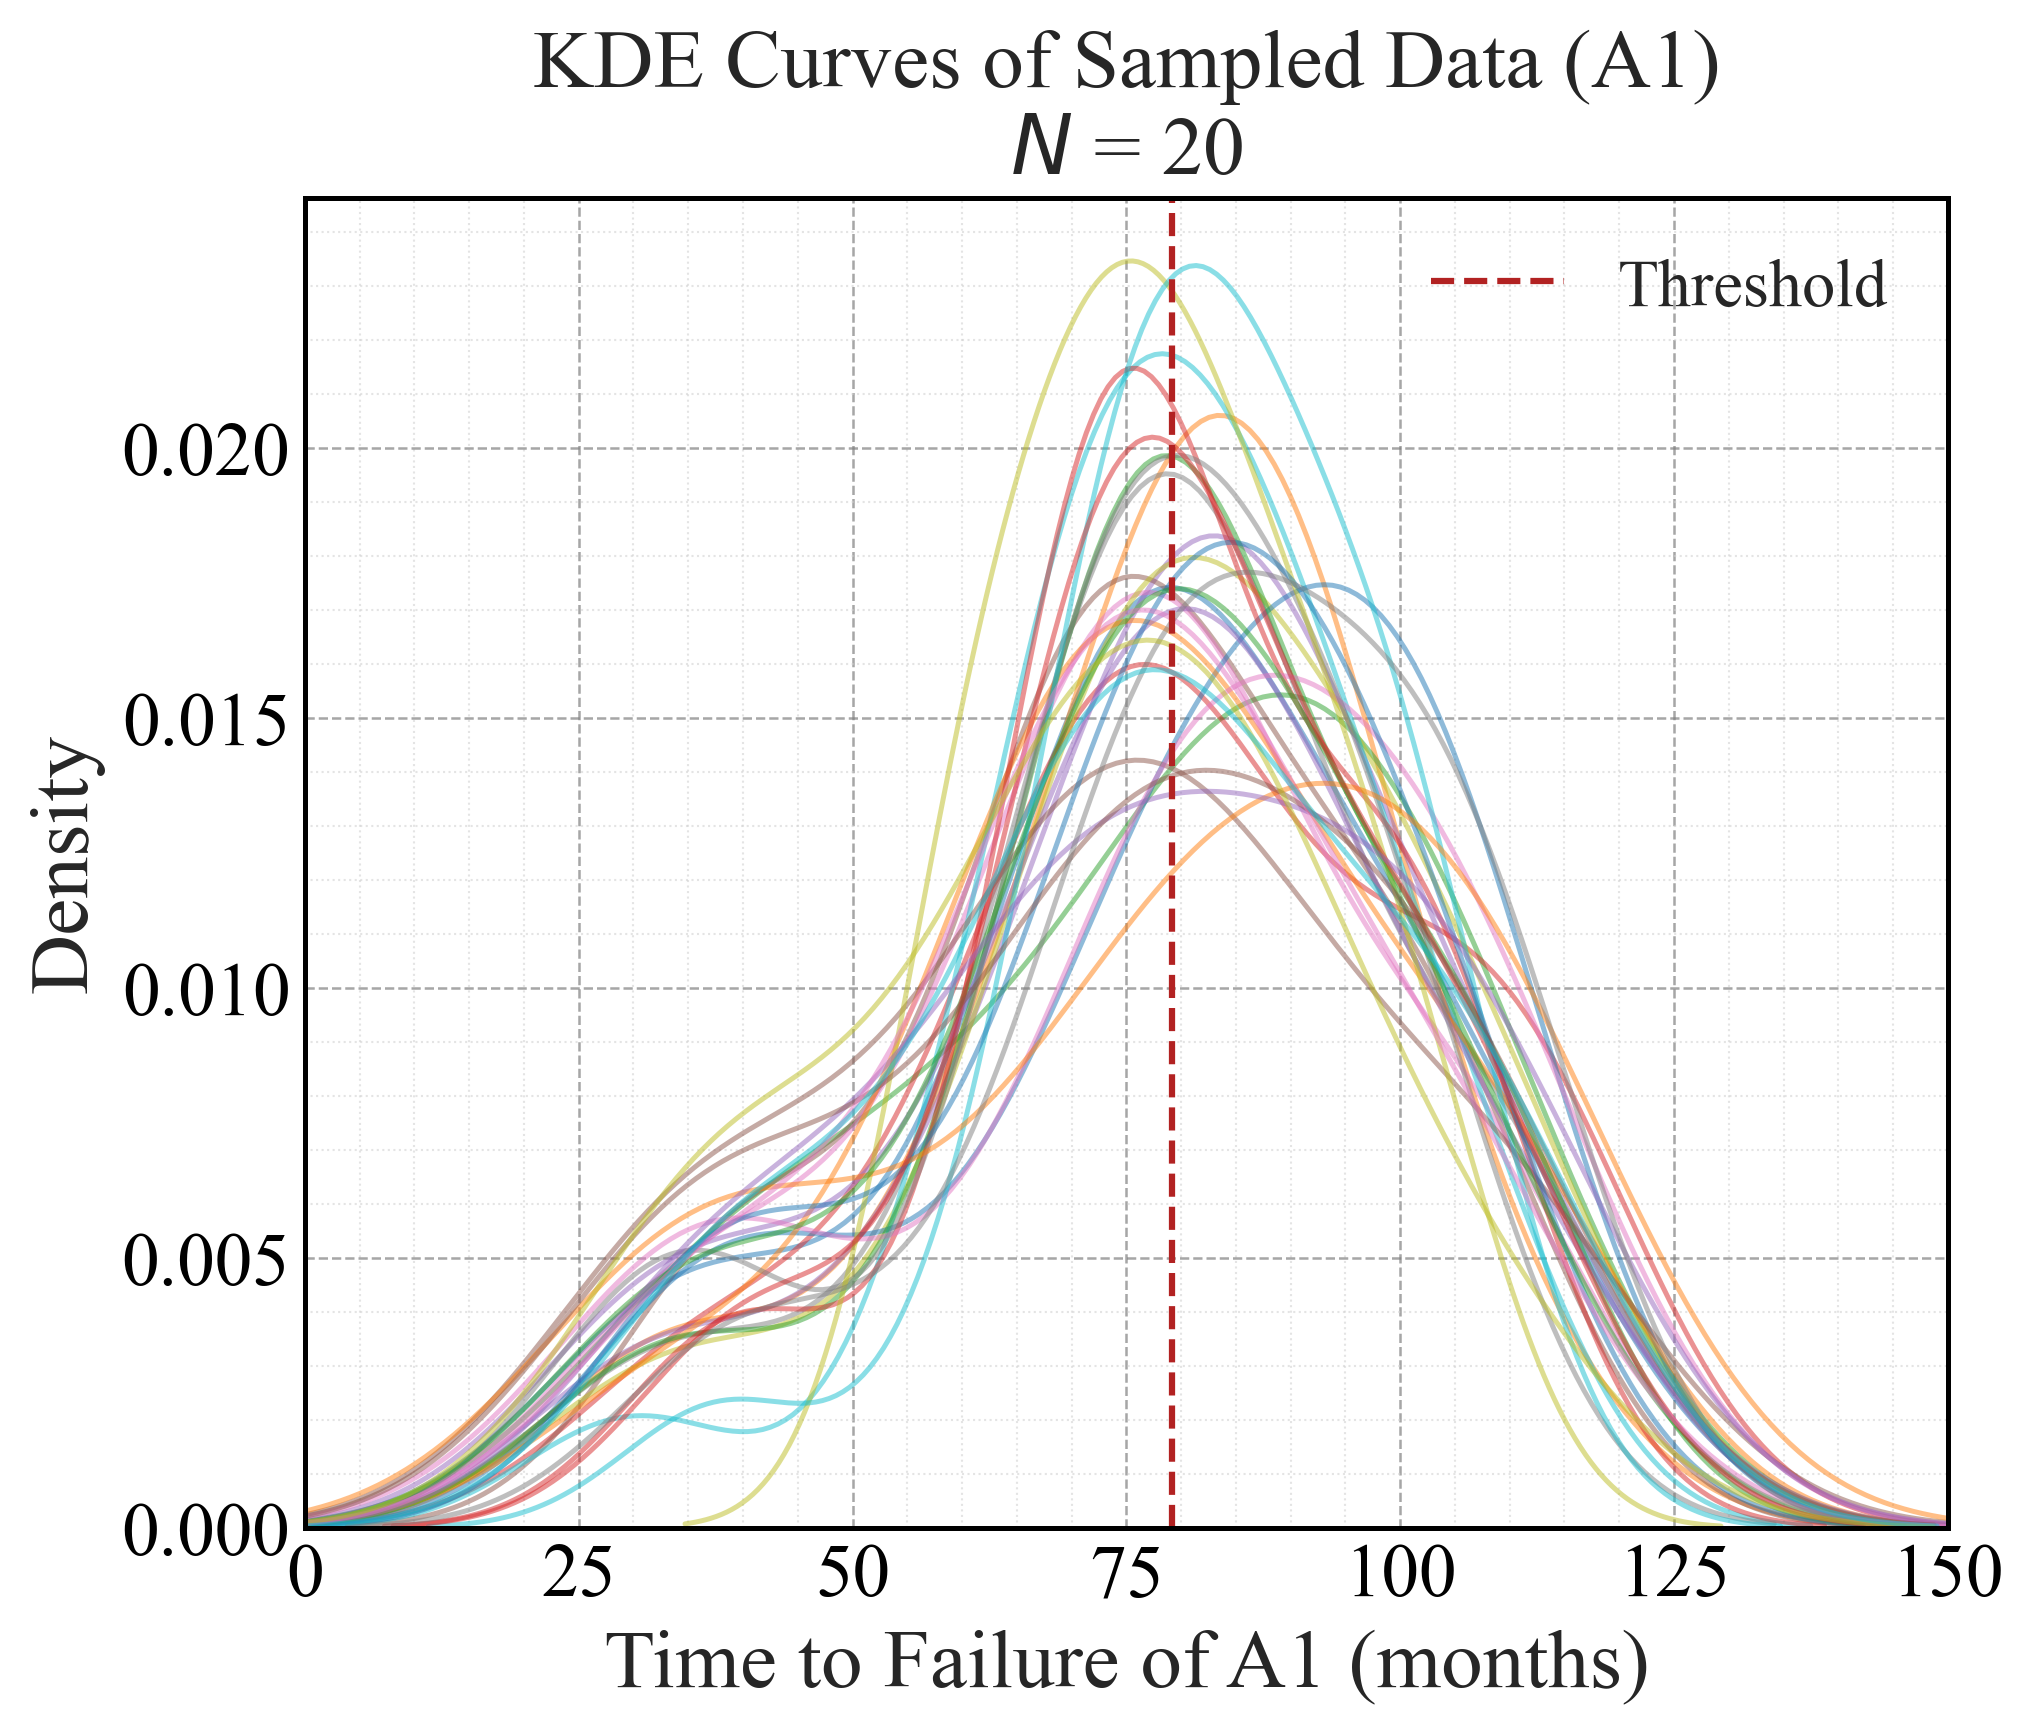

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


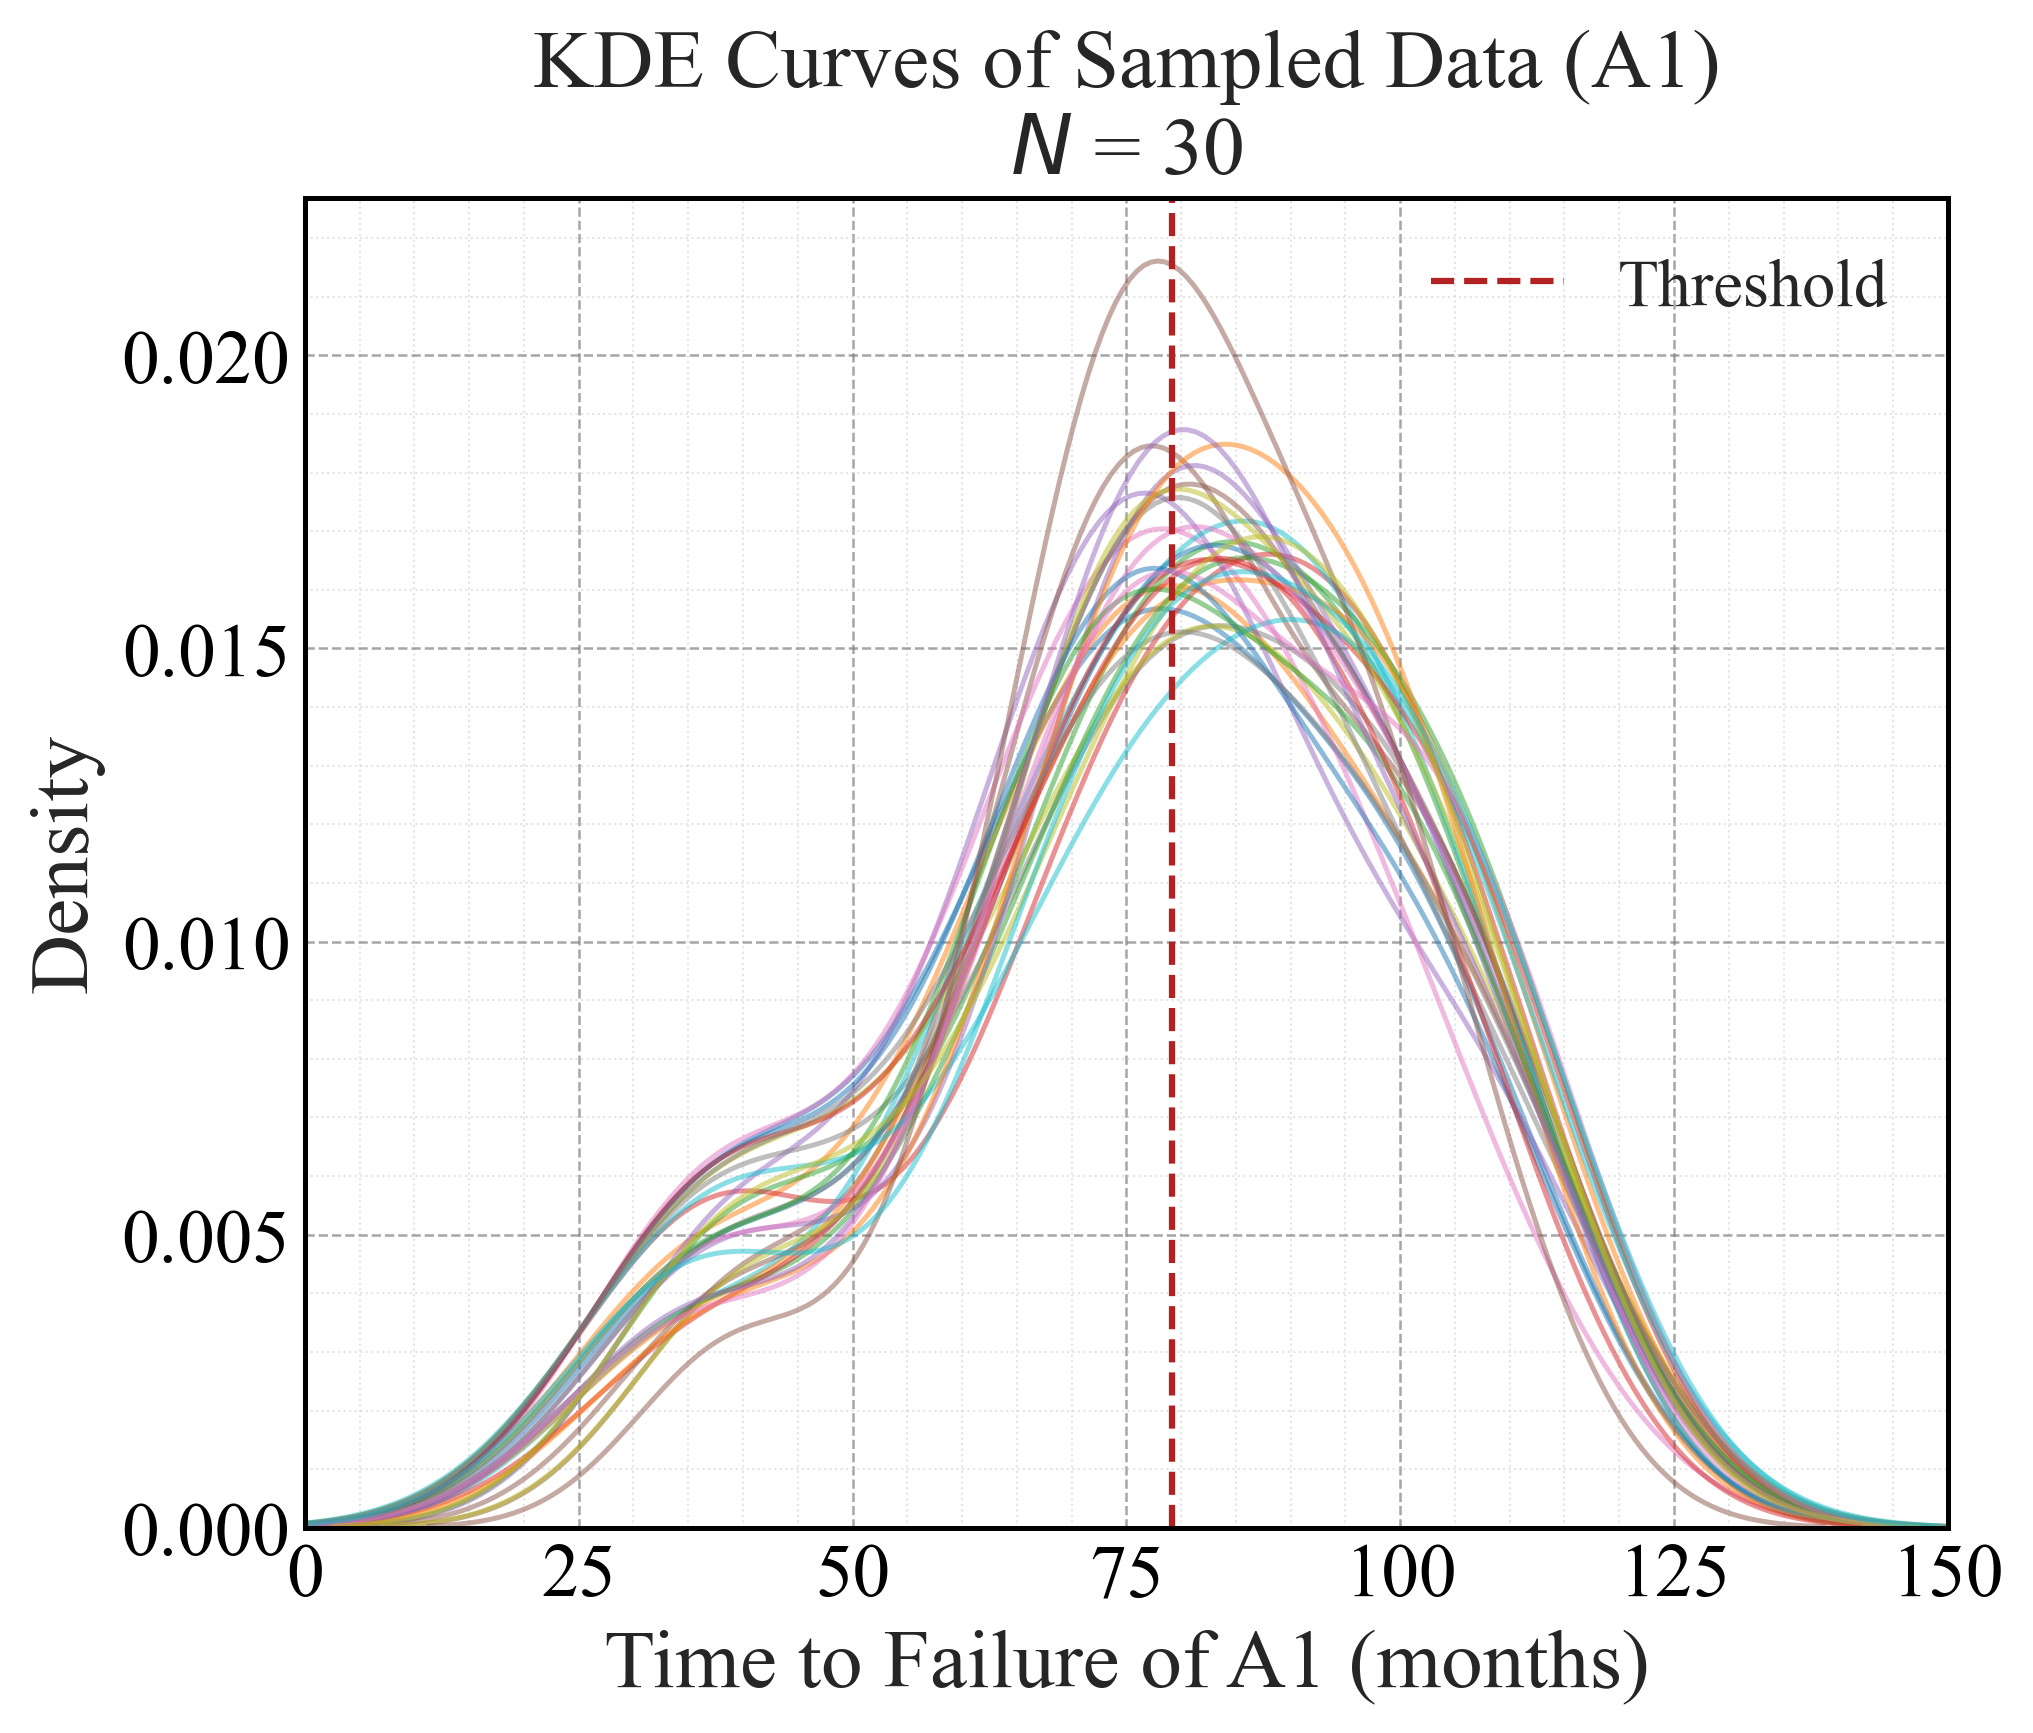

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


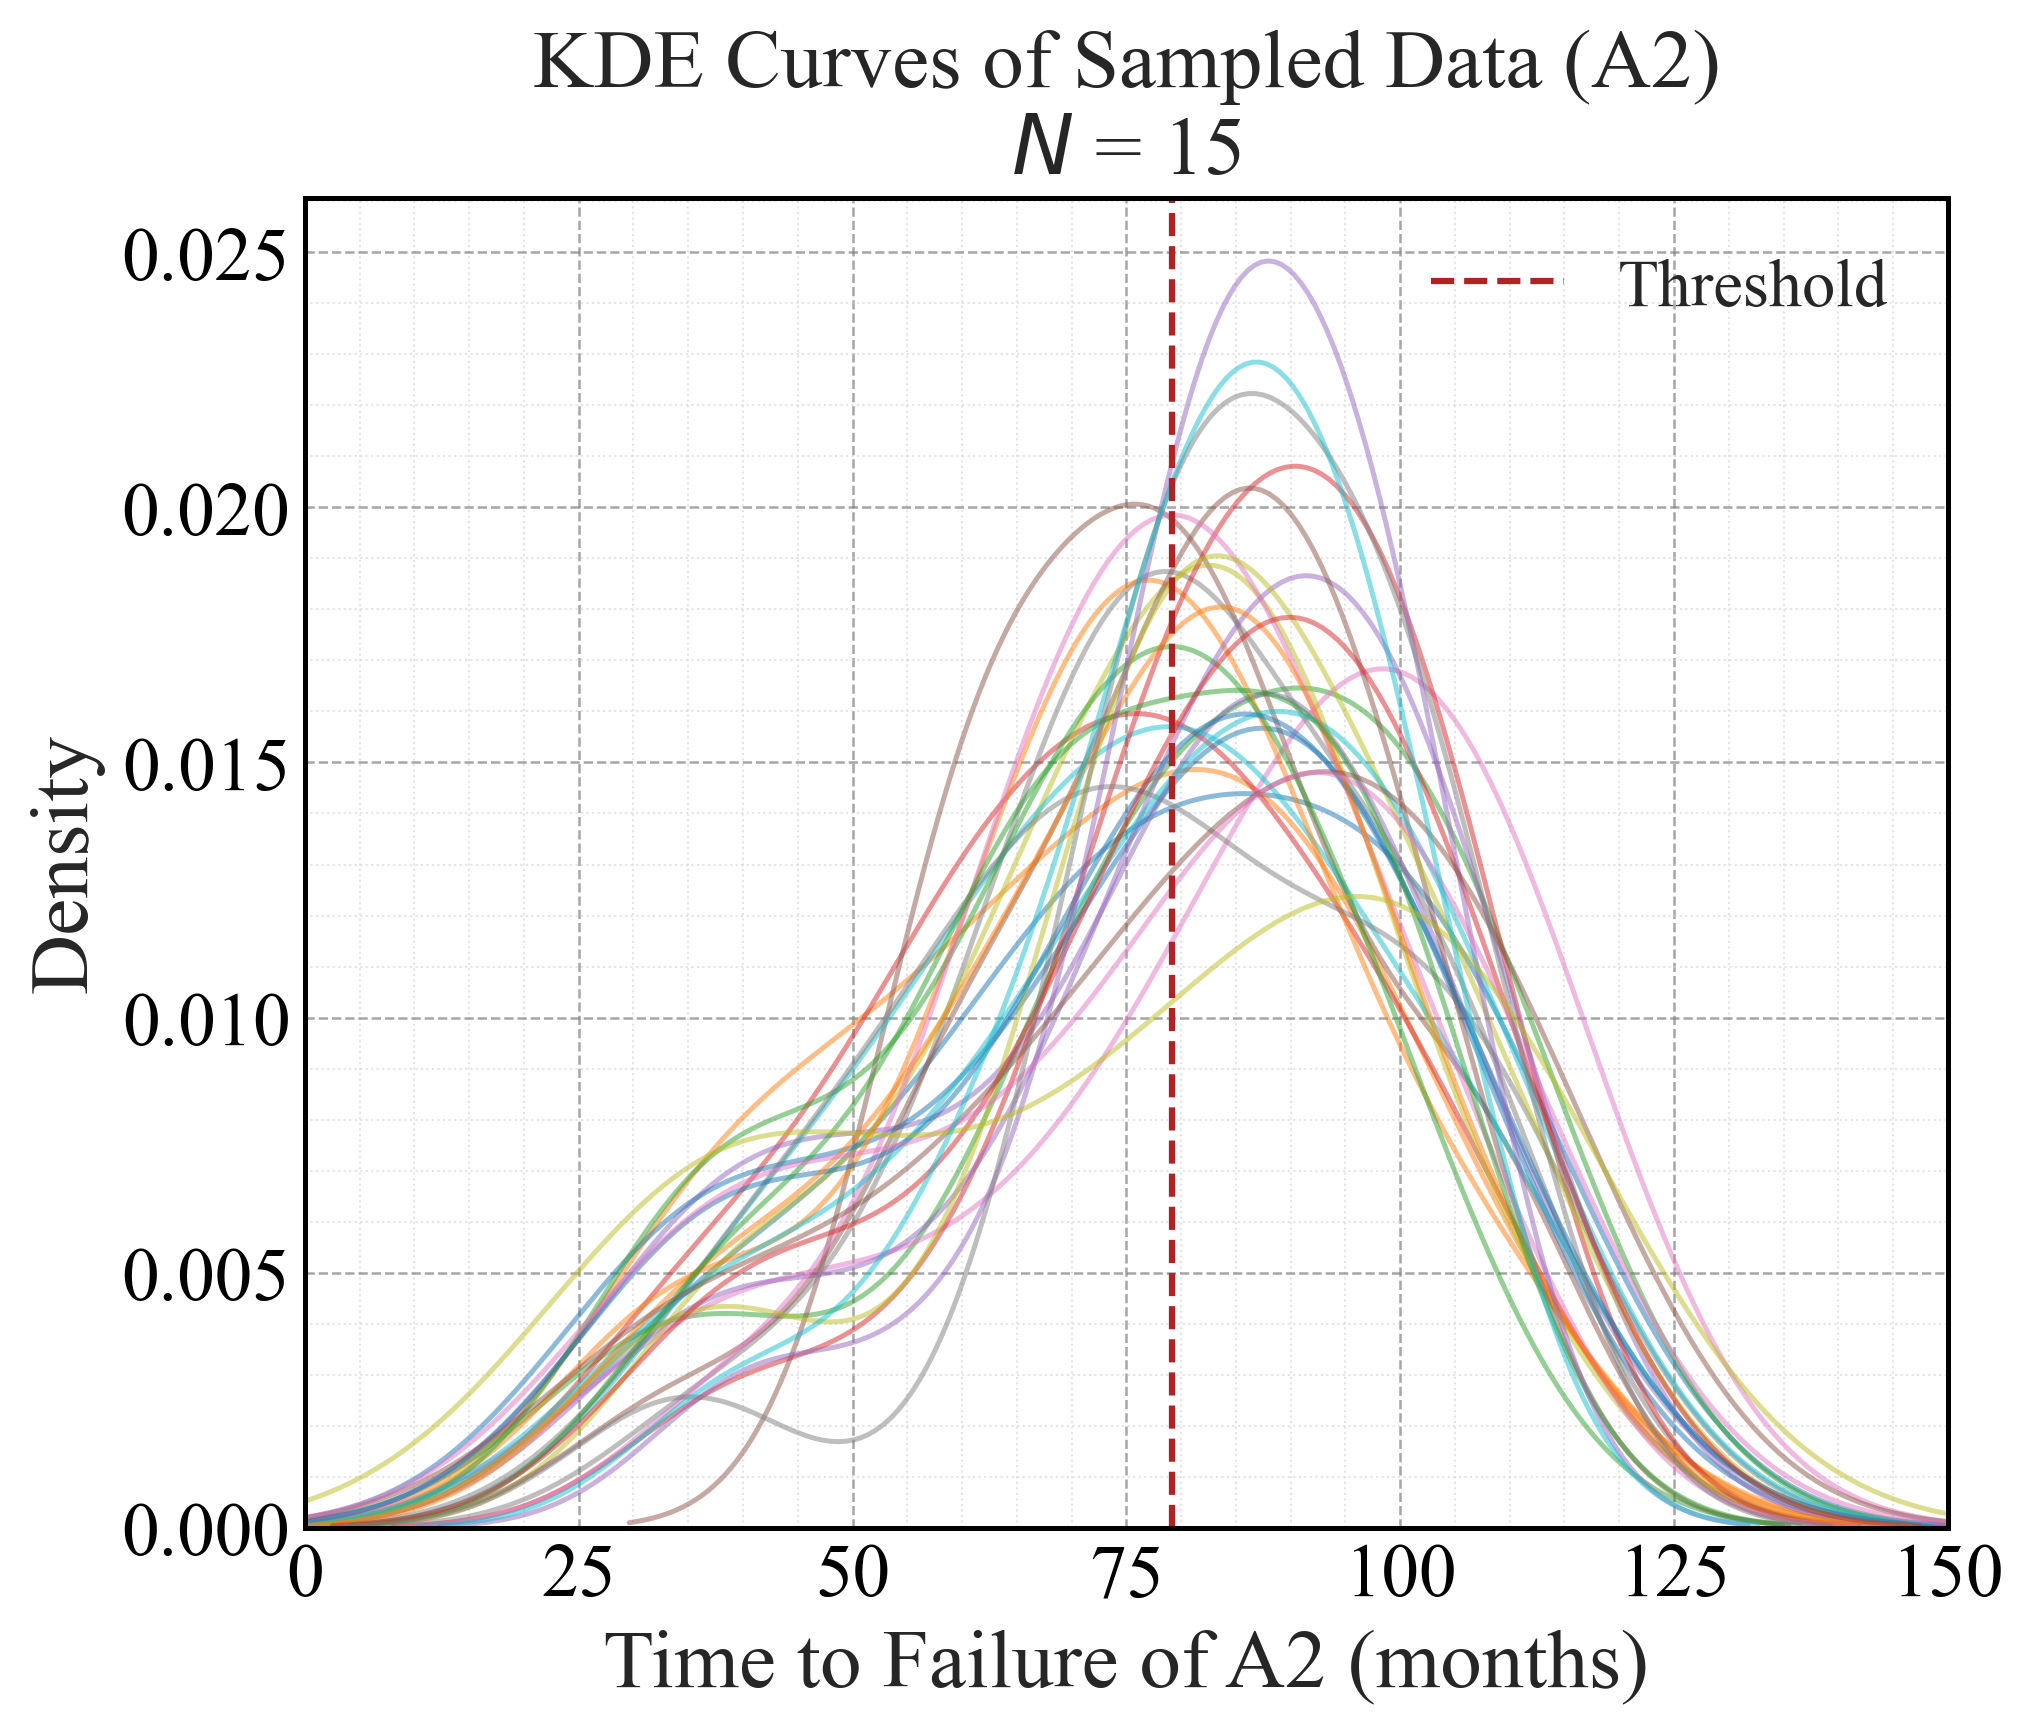

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


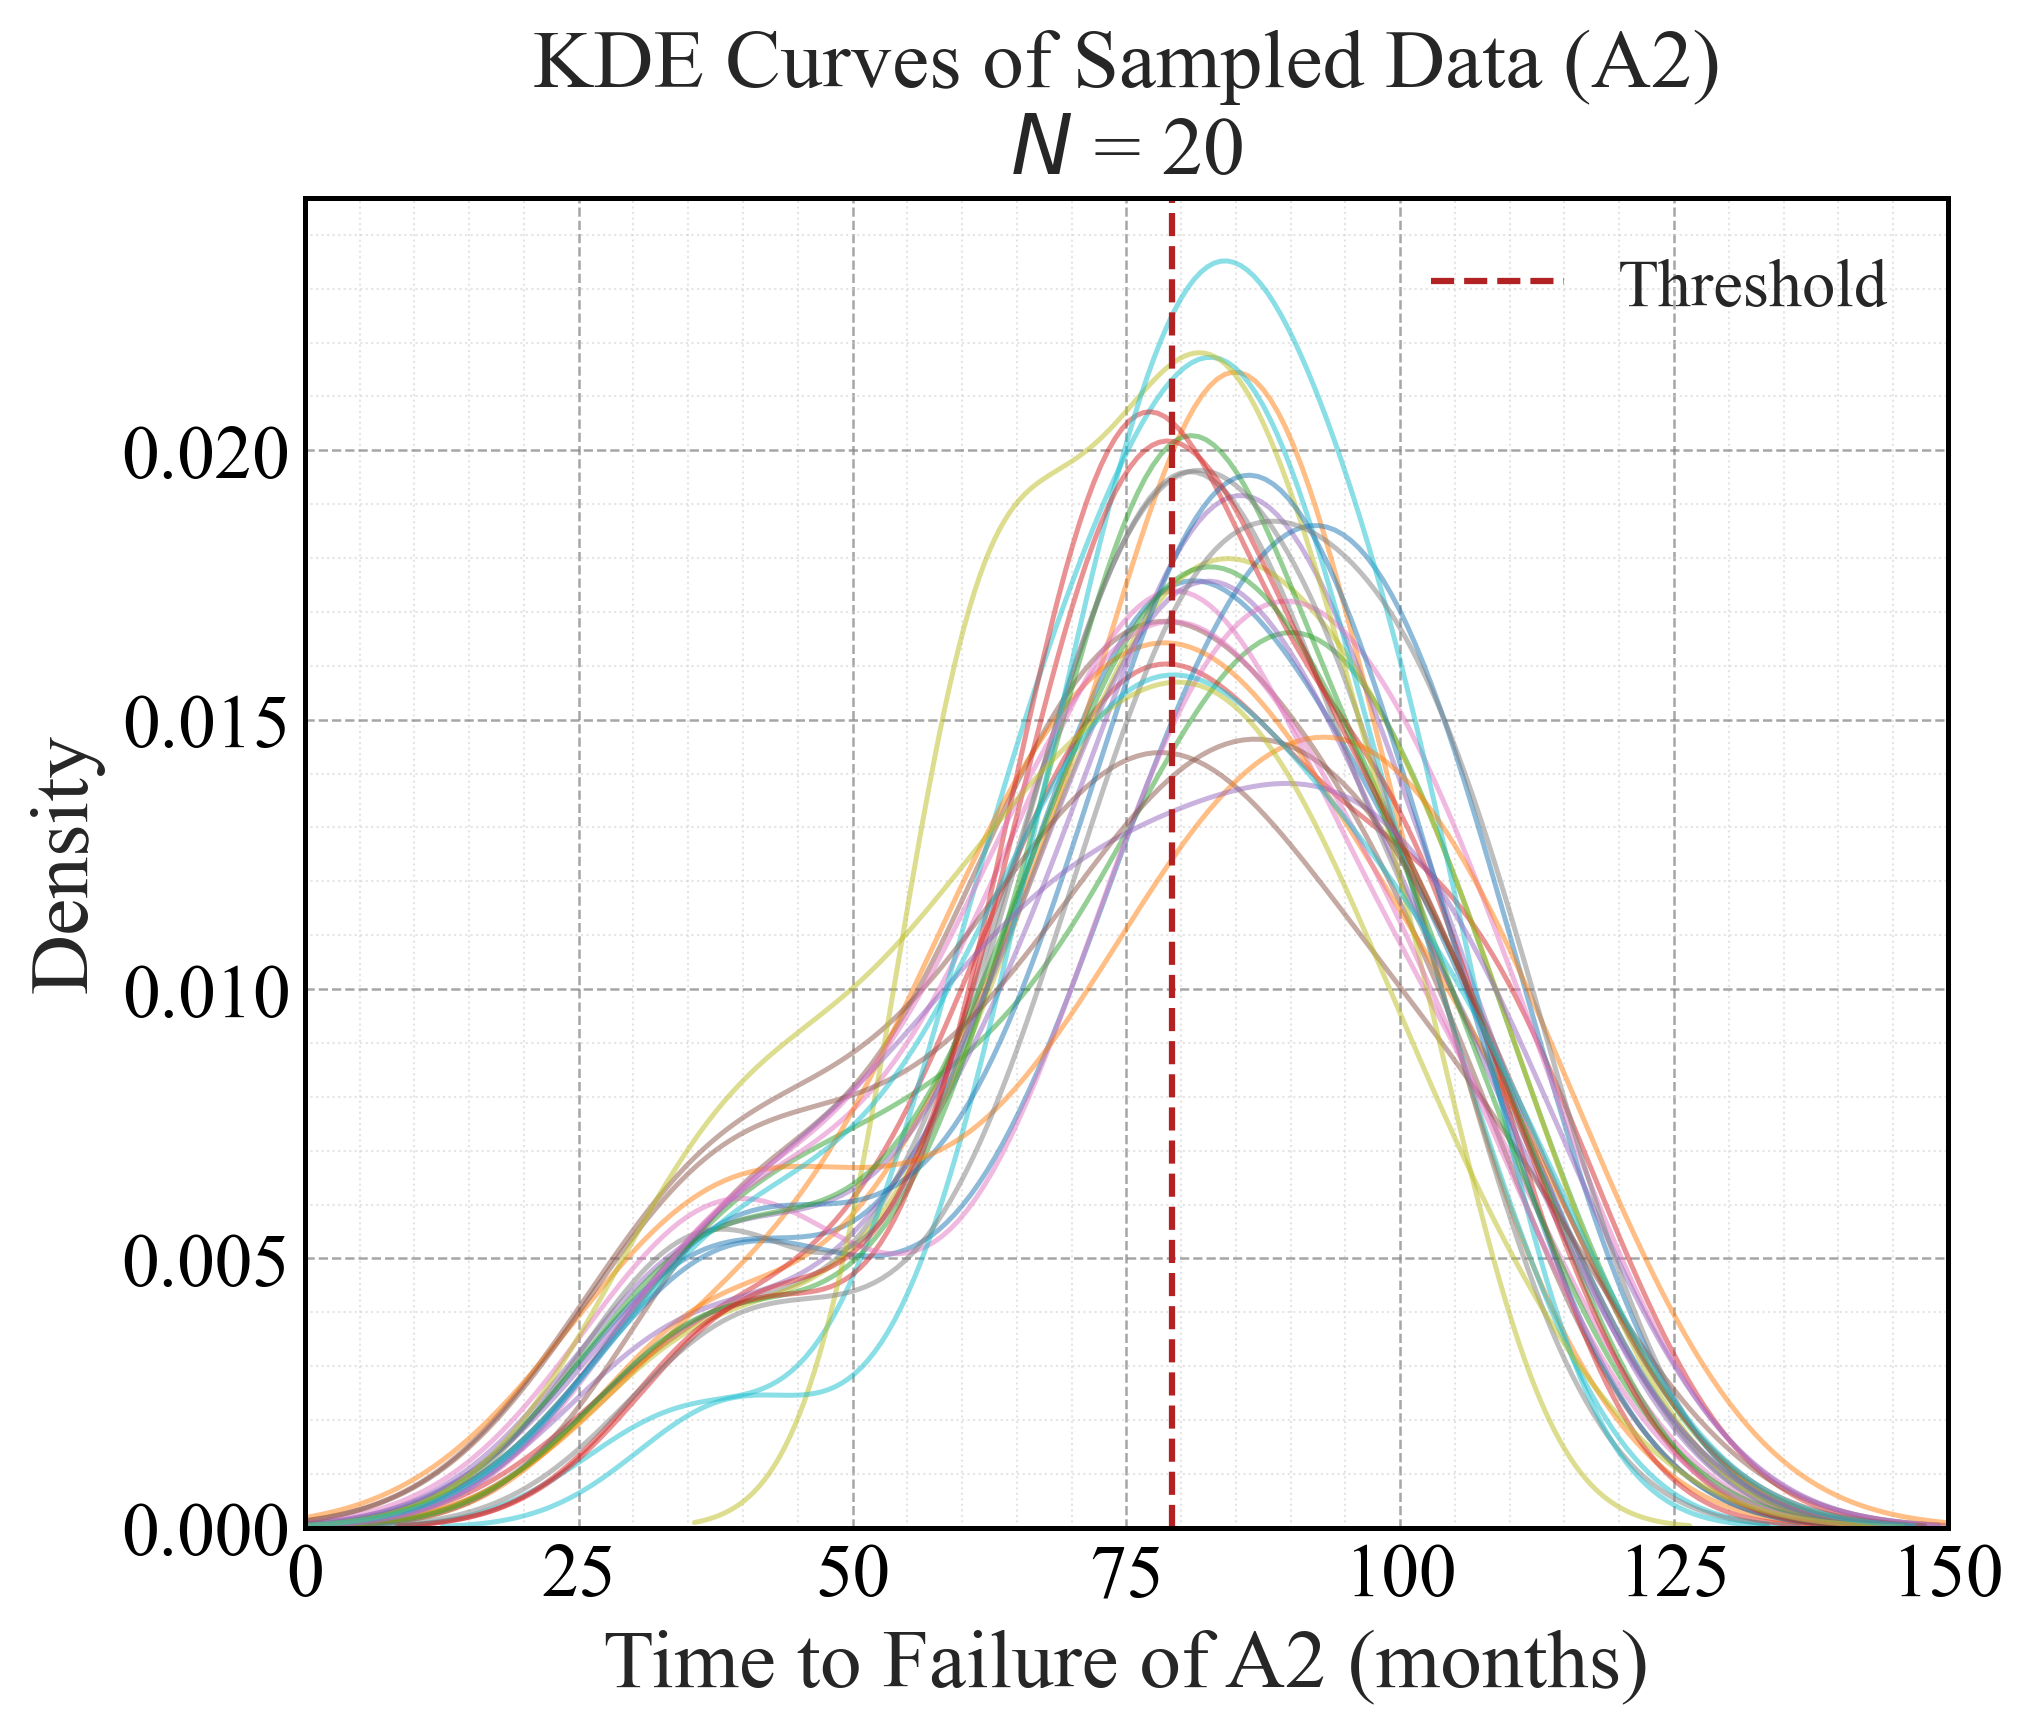

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


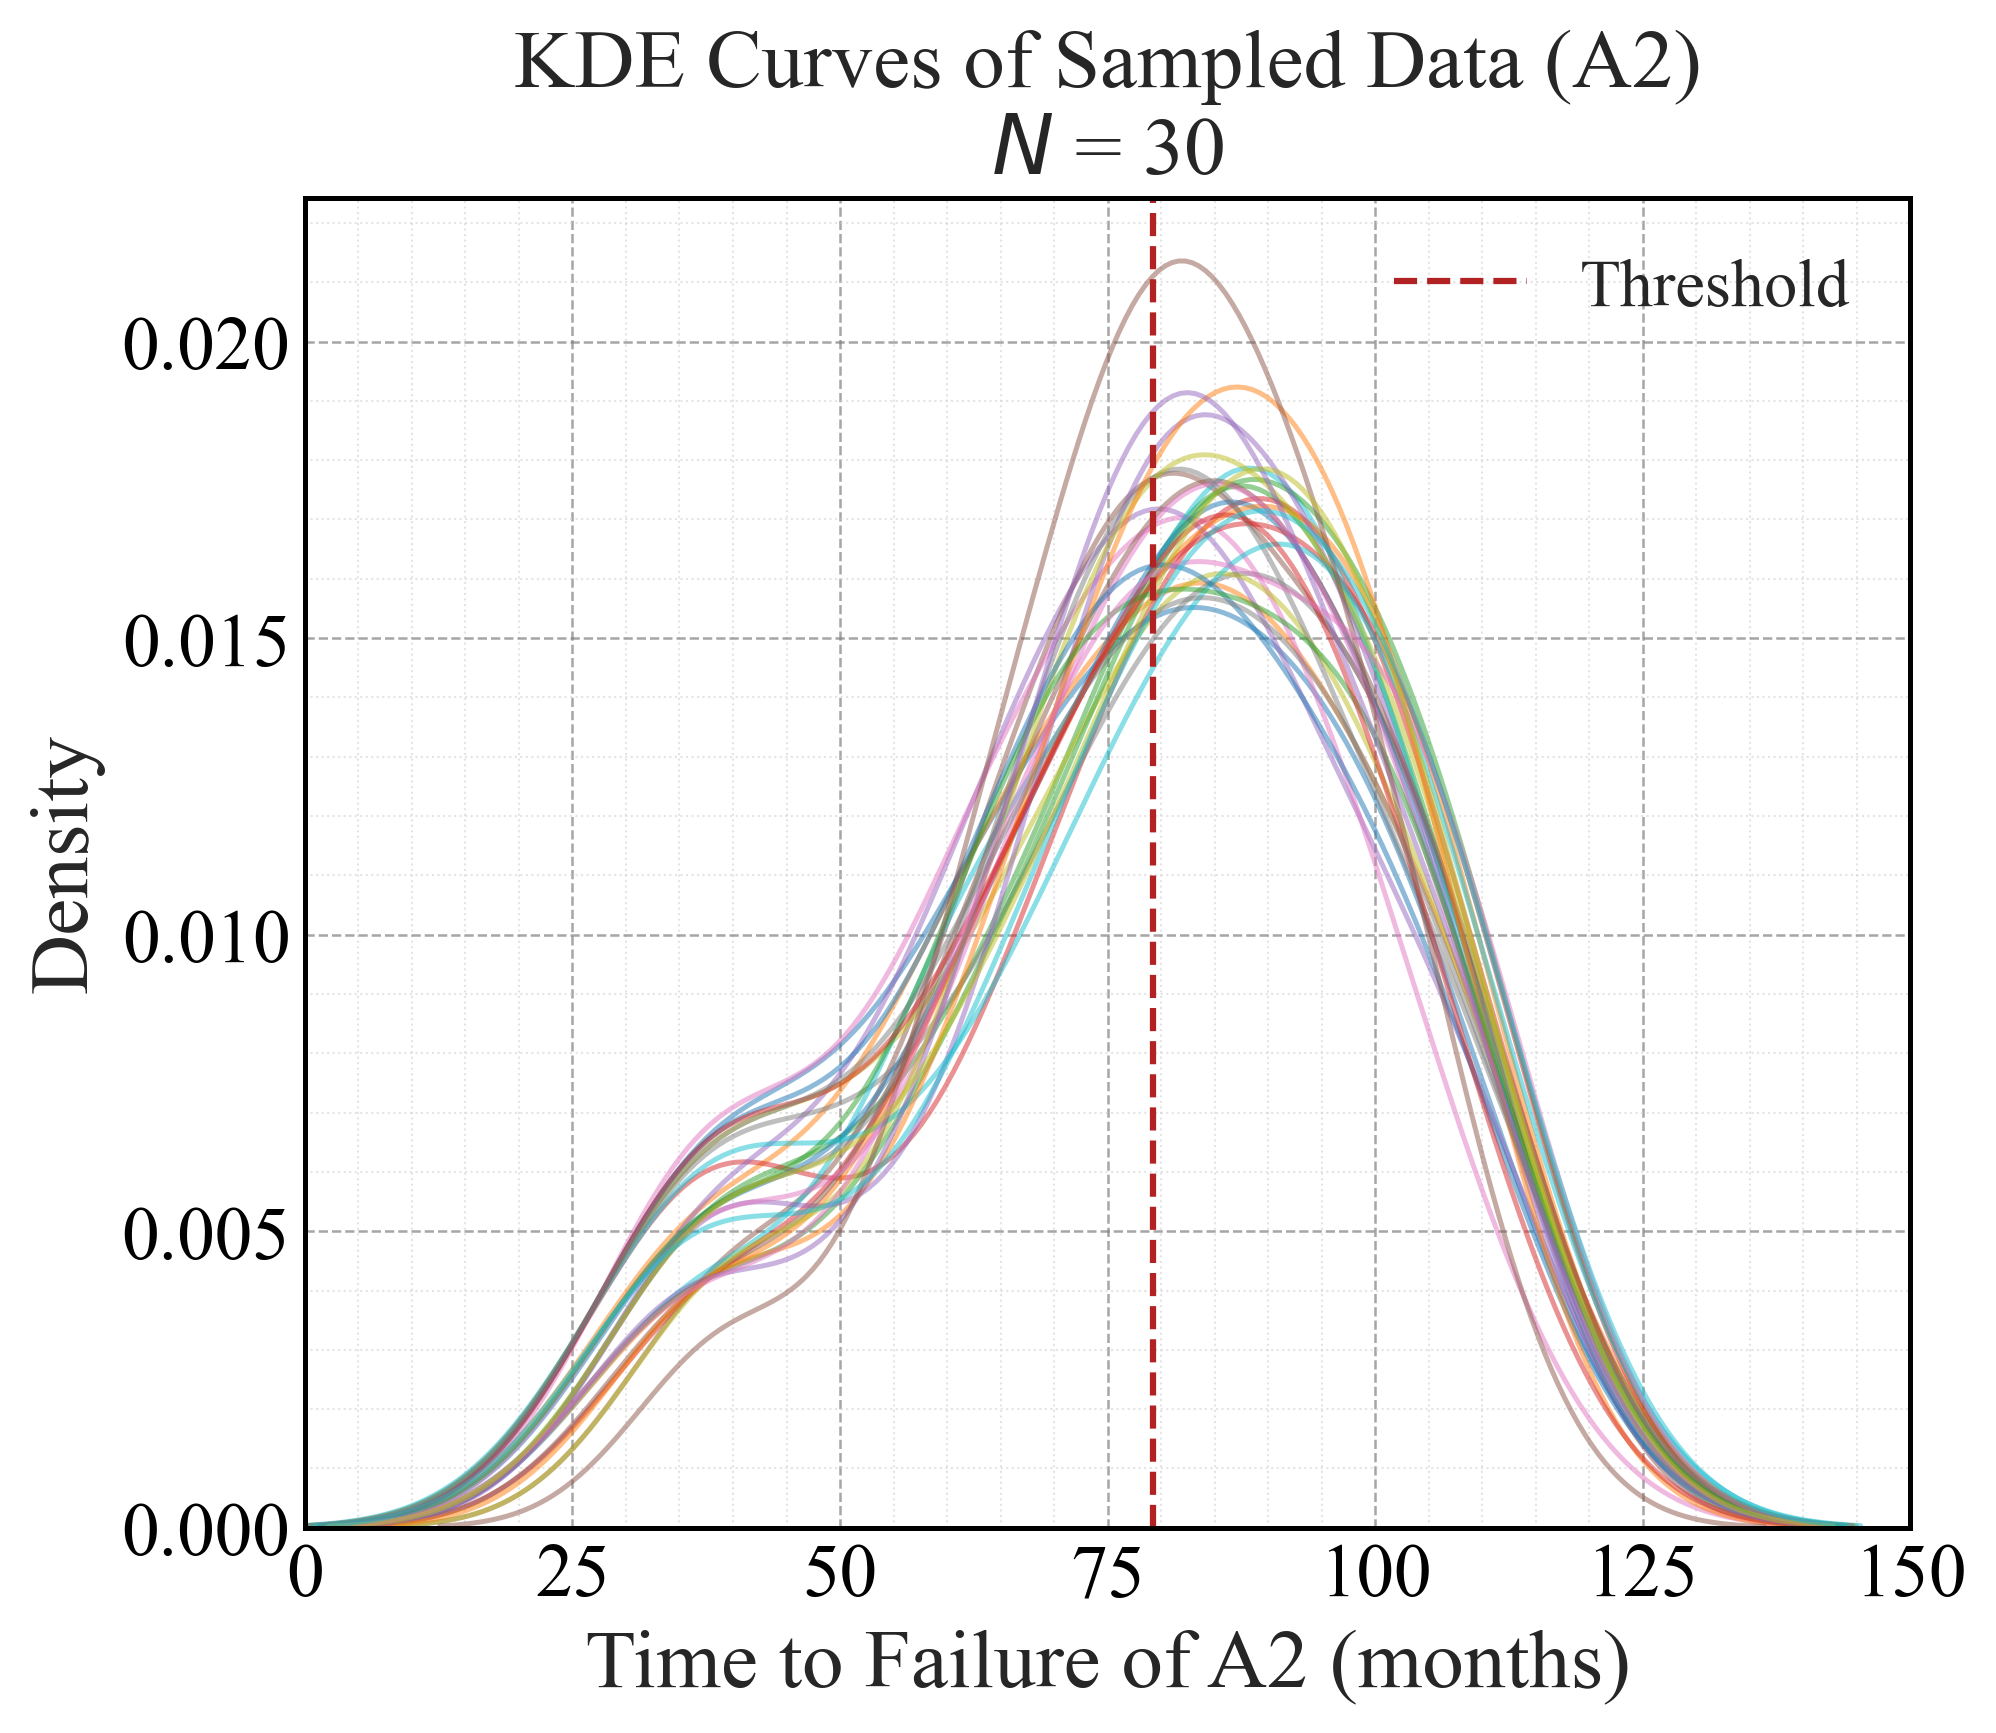

In [46]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd

# 1. ตั้งค่า Global Parameters ตามที่คุณระบุ
mpl.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "font.size": 14,
    "axes.labelsize": 20,
    "axes.titlesize": 20,
    "legend.fontsize": 16,
    "figure.dpi": 300,
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.alpha": 0.5,
    "lines.linewidth": 1.5,
})

N_array = [15, 20, 30]
fig_index = 9 
threshold_val = 6.6 * 12

for N in N_array:
    
    fig, ax = plt.subplots(figsize=(7, 6))
    palette = sns.color_palette("tab10", 30) 

    for i in range(1, 31):
        try:
            df_test = pd.read_csv(f'../bootstrapping_data/sample_{N}/sampled_data_{i}.csv')
            sns.kdeplot(
                data=df_test, 
                x="TTF of A1", 
                ax=ax,
                linewidth=1.2, 
                color=palette[i-1], 
                alpha=0.5
            )
        except FileNotFoundError:
            continue
    ax.axvline(x=threshold_val, linestyle="--", color='firebrick', linewidth=1.5, label="Threshold") 
    ax.set_title(f'KDE Curves of Sampled Data (A1)\n$N$ = {N}', fontweight='normal')
    ax.set_xlabel('Time to Failure of A1 (months)')
    ax.set_ylabel('Density')
    ax.set_xlim([0, 150]) 
    ax.legend(frameon=False, loc='upper right')

    
    for spine in ax.spines.values():
        spine.set_linewidth(1.2)       
        spine.set_color('black')       
        spine.set_visible(True)       
    ax.tick_params(direction='in', length=4, width=1, colors='black', labelsize=18)
    ax.minorticks_on()
    
    ax.grid(visible=True, which='major', color='gray', linestyle='--', linewidth=0.6, alpha=0.7)
    ax.grid(visible=True, which='minor', color='lightgray', linestyle=':', linewidth=0.5, alpha=0.6)

    plt.tight_layout()
    plt.savefig(f'../sim_result/Fig{fig_index}a.eps', format='eps', bbox_inches='tight')
    plt.show()
    
    fig_index += 1


N_array = [15, 20, 30]
j = 9 
threshold_val = 6.6 * 12

for N in N_array:
    # สร้าง Figure และ Axes
    fig, ax = plt.subplots(figsize=(7, 6))
    
    # เลือกใช้ Palette สีที่ดู Professional
    palette = sns.color_palette("tab10", 30)

    # 2. วาด KDE Curves สำหรับ A2 จำนวน 30 เส้น
    for i in range(1, 31):
        try:
            df_test = pd.read_csv(f'../bootstrapping_data/sample_{N}/sampled_data_{i}.csv')
            sns.kdeplot(
                data=df_test, 
                x="TTF of A2", 
                ax=ax,
                linewidth=1.2, 
                color=palette[i-1], 
                alpha=0.5
            )
        except FileNotFoundError:
            print(f"Warning: File sampled_data_{i}.csv not found for N={N}")

    # 3. เส้นขีดเกณฑ์ (Threshold)
    ax.axvline(x=threshold_val, linestyle="--", color='firebrick', linewidth=1.5, label="Threshold")

    # 4. ตั้งค่าตกแต่งตามสไตล์ที่คุณระบุ
    ax.set_title(f'KDE Curves of Sampled Data (A2)\n$N$ = {N}', fontweight='normal')
    ax.set_xlabel('Time to Failure of A2 (months)')
    ax.set_ylabel('Density')
    
    # กำหนดขอบเขตแกน (ปรับเปลี่ยนได้ตามความเหมาะสมของข้อมูล)
    ax.set_xlim([0, 150]) 
    
    # ตั้งค่า Legend (เอาเส้นขอบออก)
    ax.legend(frameon=False, loc='upper right')

    # ปรับแต่งเส้นขอบกราฟ (Spines) ให้ปรากฏครบทุกด้าน
    for spine in ax.spines.values():
        spine.set_linewidth(1.2)       
        spine.set_color('black')       
        spine.set_visible(True)       

    # ตั้งค่า Ticks ให้หันเข้า (Inward) และเปิด Minor ticks
    ax.tick_params(direction='in', length=4, width=1, colors='black', labelsize=18)
    ax.minorticks_on()
    
    # ตั้งค่า Grid ทั้งเส้นหลักและเส้นย่อย
    ax.grid(visible=True, which='major', color='gray', linestyle='--', linewidth=0.6, alpha=0.7)
    ax.grid(visible=True, which='minor', color='lightgray', linestyle=':', linewidth=0.5, alpha=0.6)

    # 5. บันทึกเป็นไฟล์ .eps (หรือเปลี่ยนเป็น .png ถ้าต้องการ)
    plt.tight_layout()
    plt.savefig(f'../sim_result/Fig{j}b.eps', format='eps', bbox_inches='tight')
    plt.show()
    
    j += 1

### Summary Data for each bootstrap data

In [16]:
N_array = [15,20,30]
for N in N_array:
    mean_A1 = []
    mean_A2 = []
    std_A1 = []
    std_A2 = []
    with pd.ExcelWriter(f'../bootstrapping_data/summary_sheet/sampled_data_n={N}.xlsx', engine='xlsxwriter') as writer:
        for i in range(1, 31):
            df_test = pd.read_csv(f'../bootstrapping_data/sample_{N}/sampled_data_{i}.csv')
            
            # เก็บค่า mean, std
            mean_A1.append(np.mean(df_test['TTF of A1']))
            mean_A2.append(np.mean(df_test['TTF of A2']))
            std_A1.append(np.std(df_test['TTF of A1'], ddof=1))
            std_A2.append(np.std(df_test['TTF of A2'], ddof=1))
            
            # เขียนแต่ละ sample ลง sheet
            df_test.to_excel(writer, sheet_name=f'sample_{i}', index=False)
        
        # ทำตารางสรุป mean/std
        summary = pd.DataFrame({
            'Sample': [f'sample_{i}' for i in range(1, 31)],
            'Mean_A1': mean_A1,
            'Std_A1': std_A1,
            'Mean_A2': mean_A2,
            'Std_A2': std_A2
        })
        
        # เขียน summary ลง sheet สุดท้าย
        summary.to_excel(writer, sheet_name='Summary', index=False)


## Hypothesis testing

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


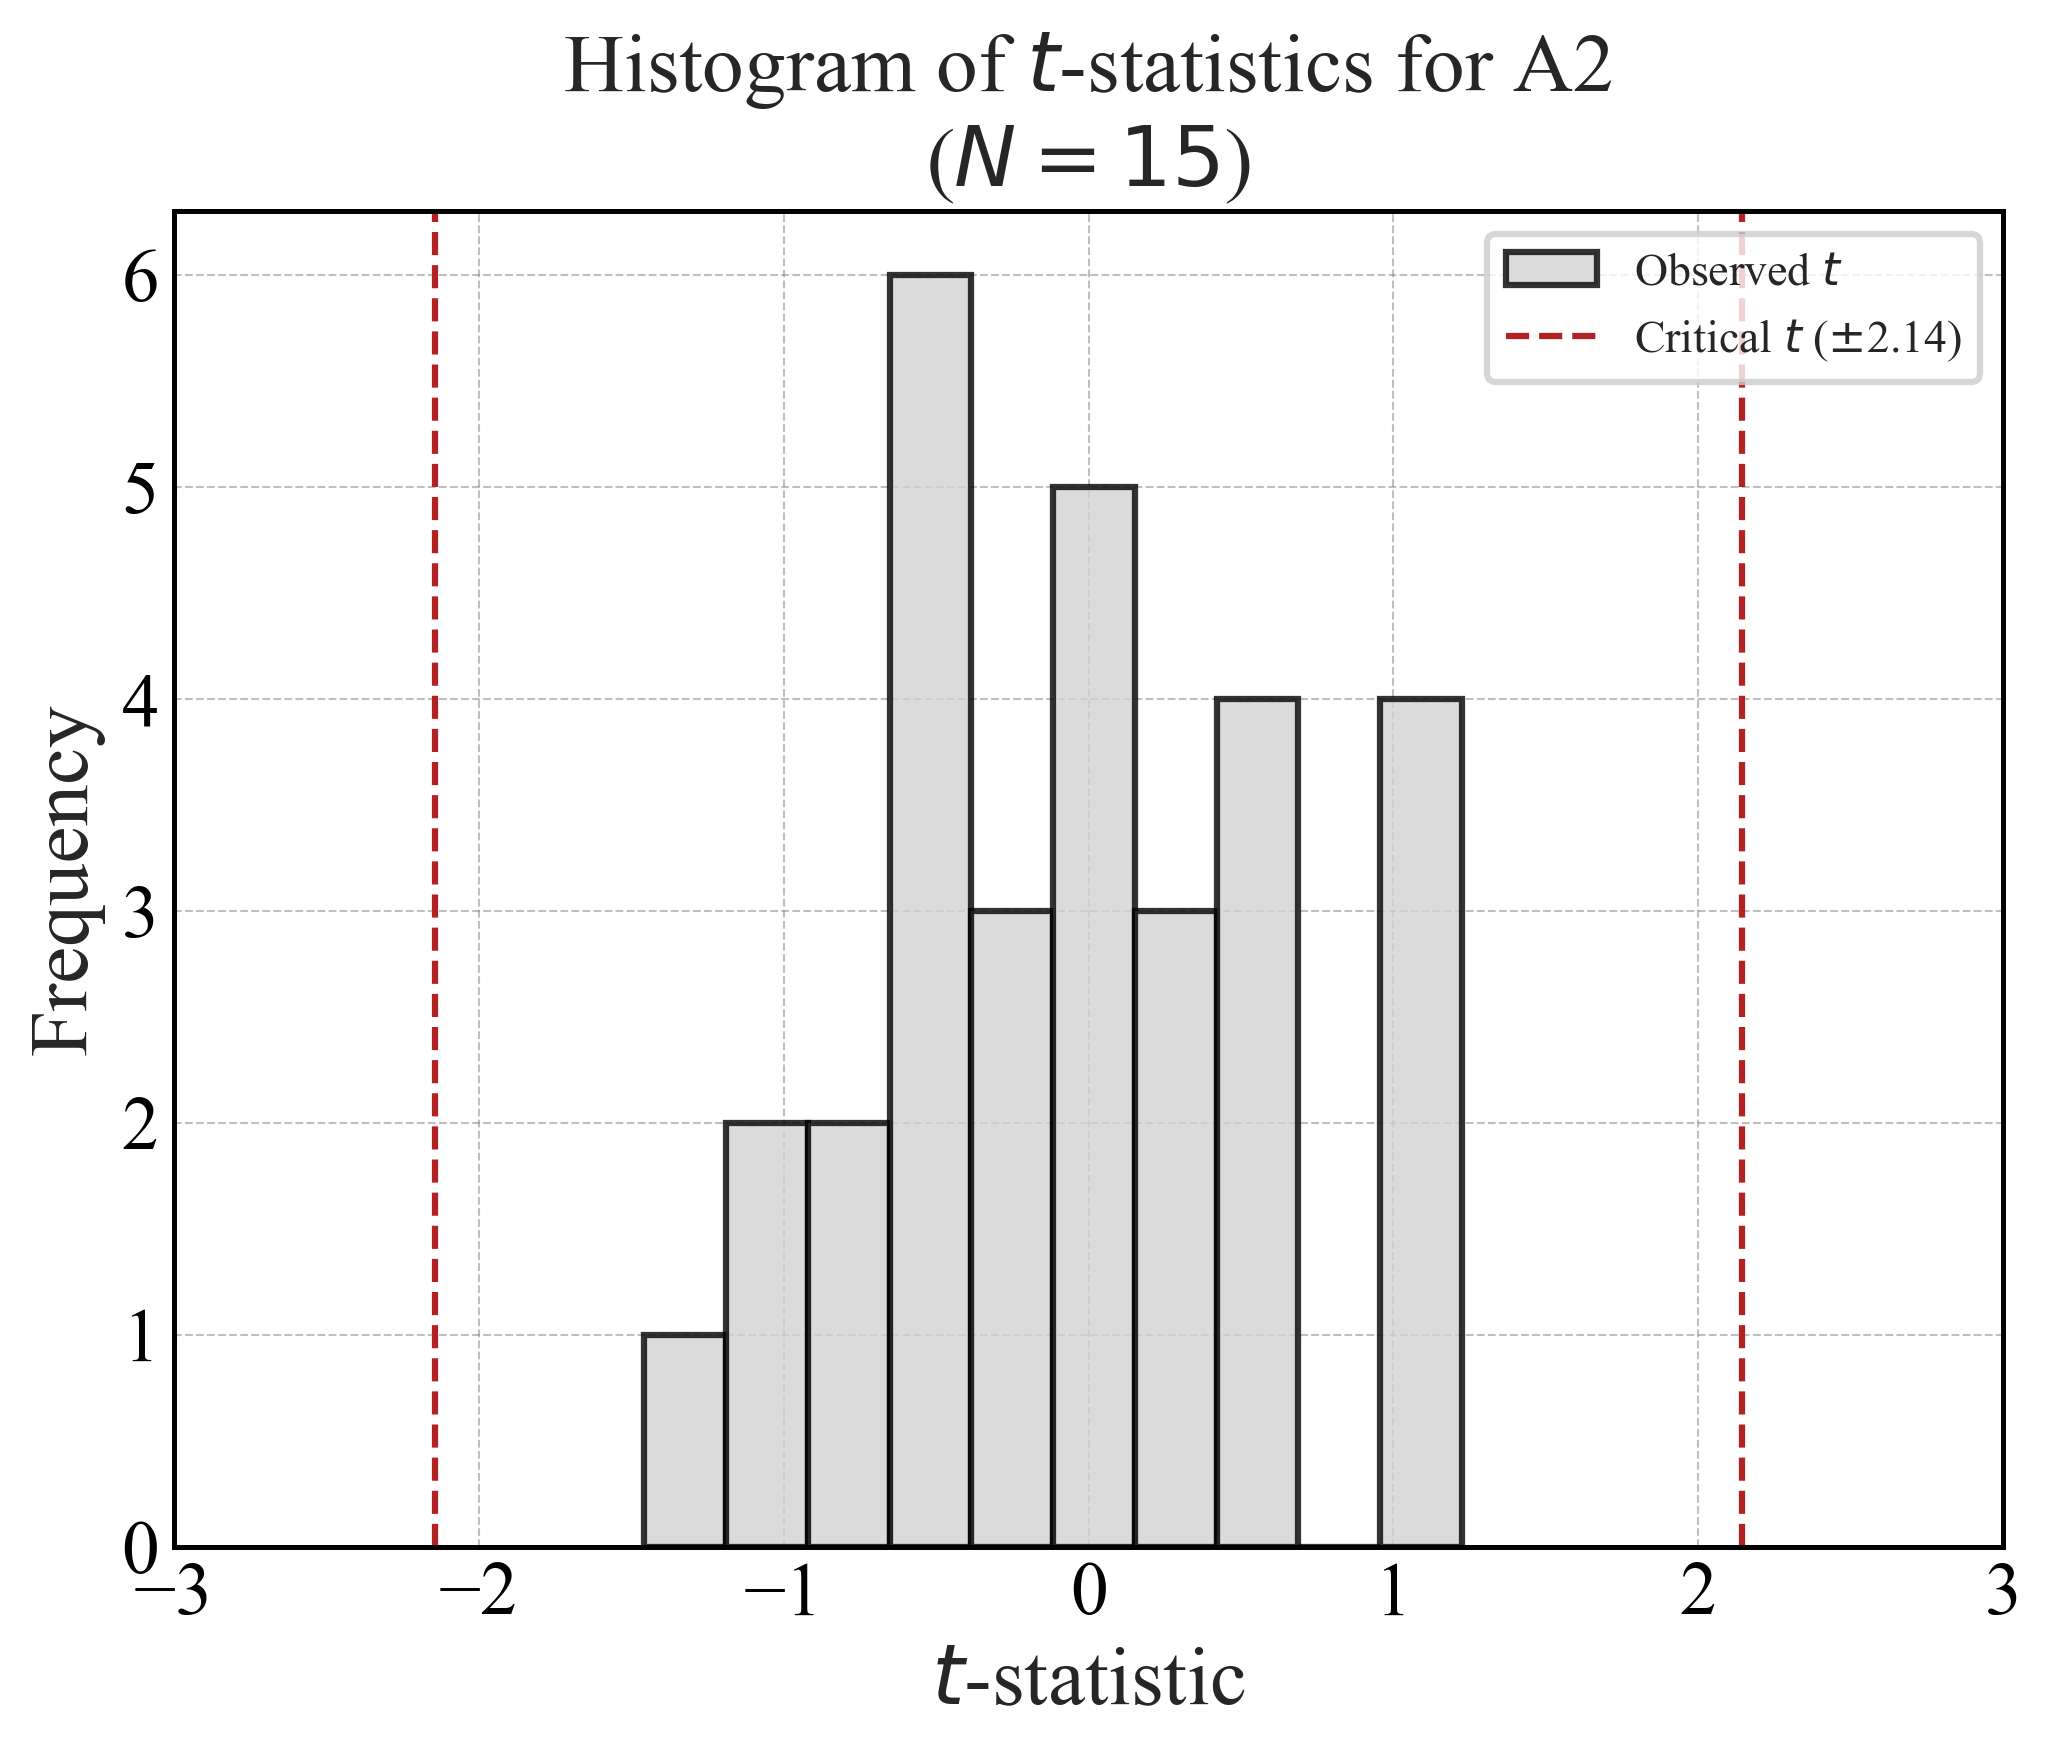

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


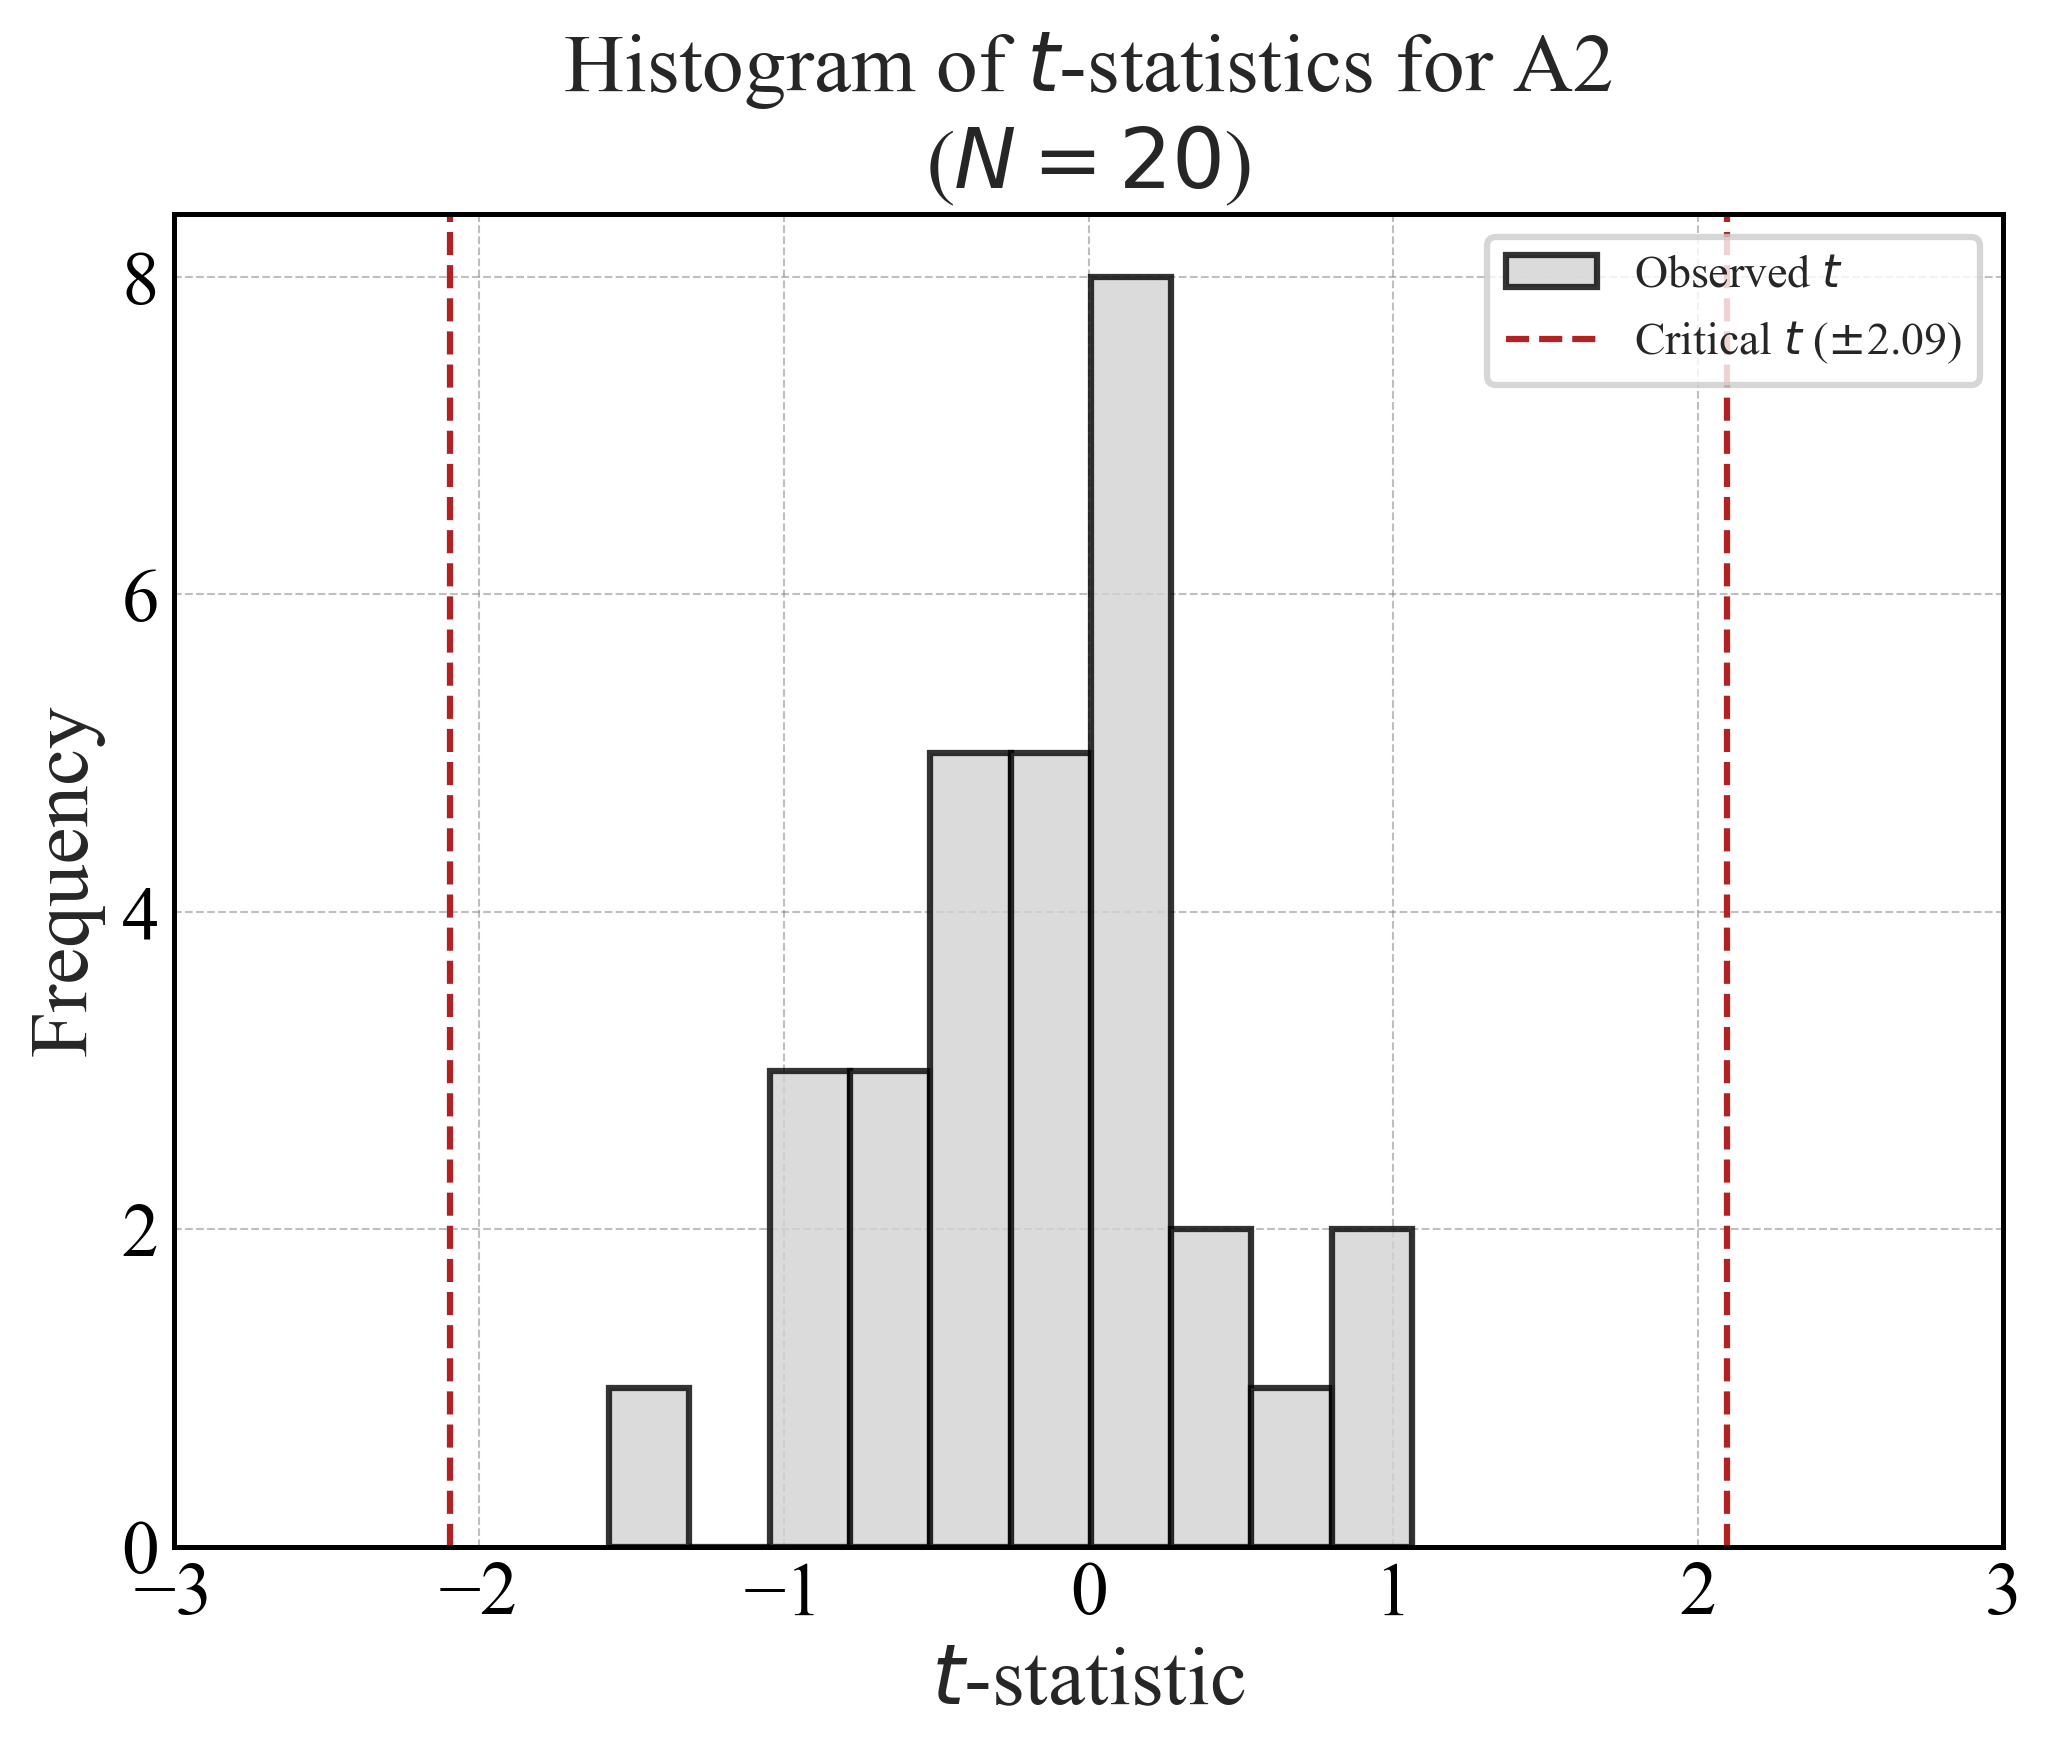

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


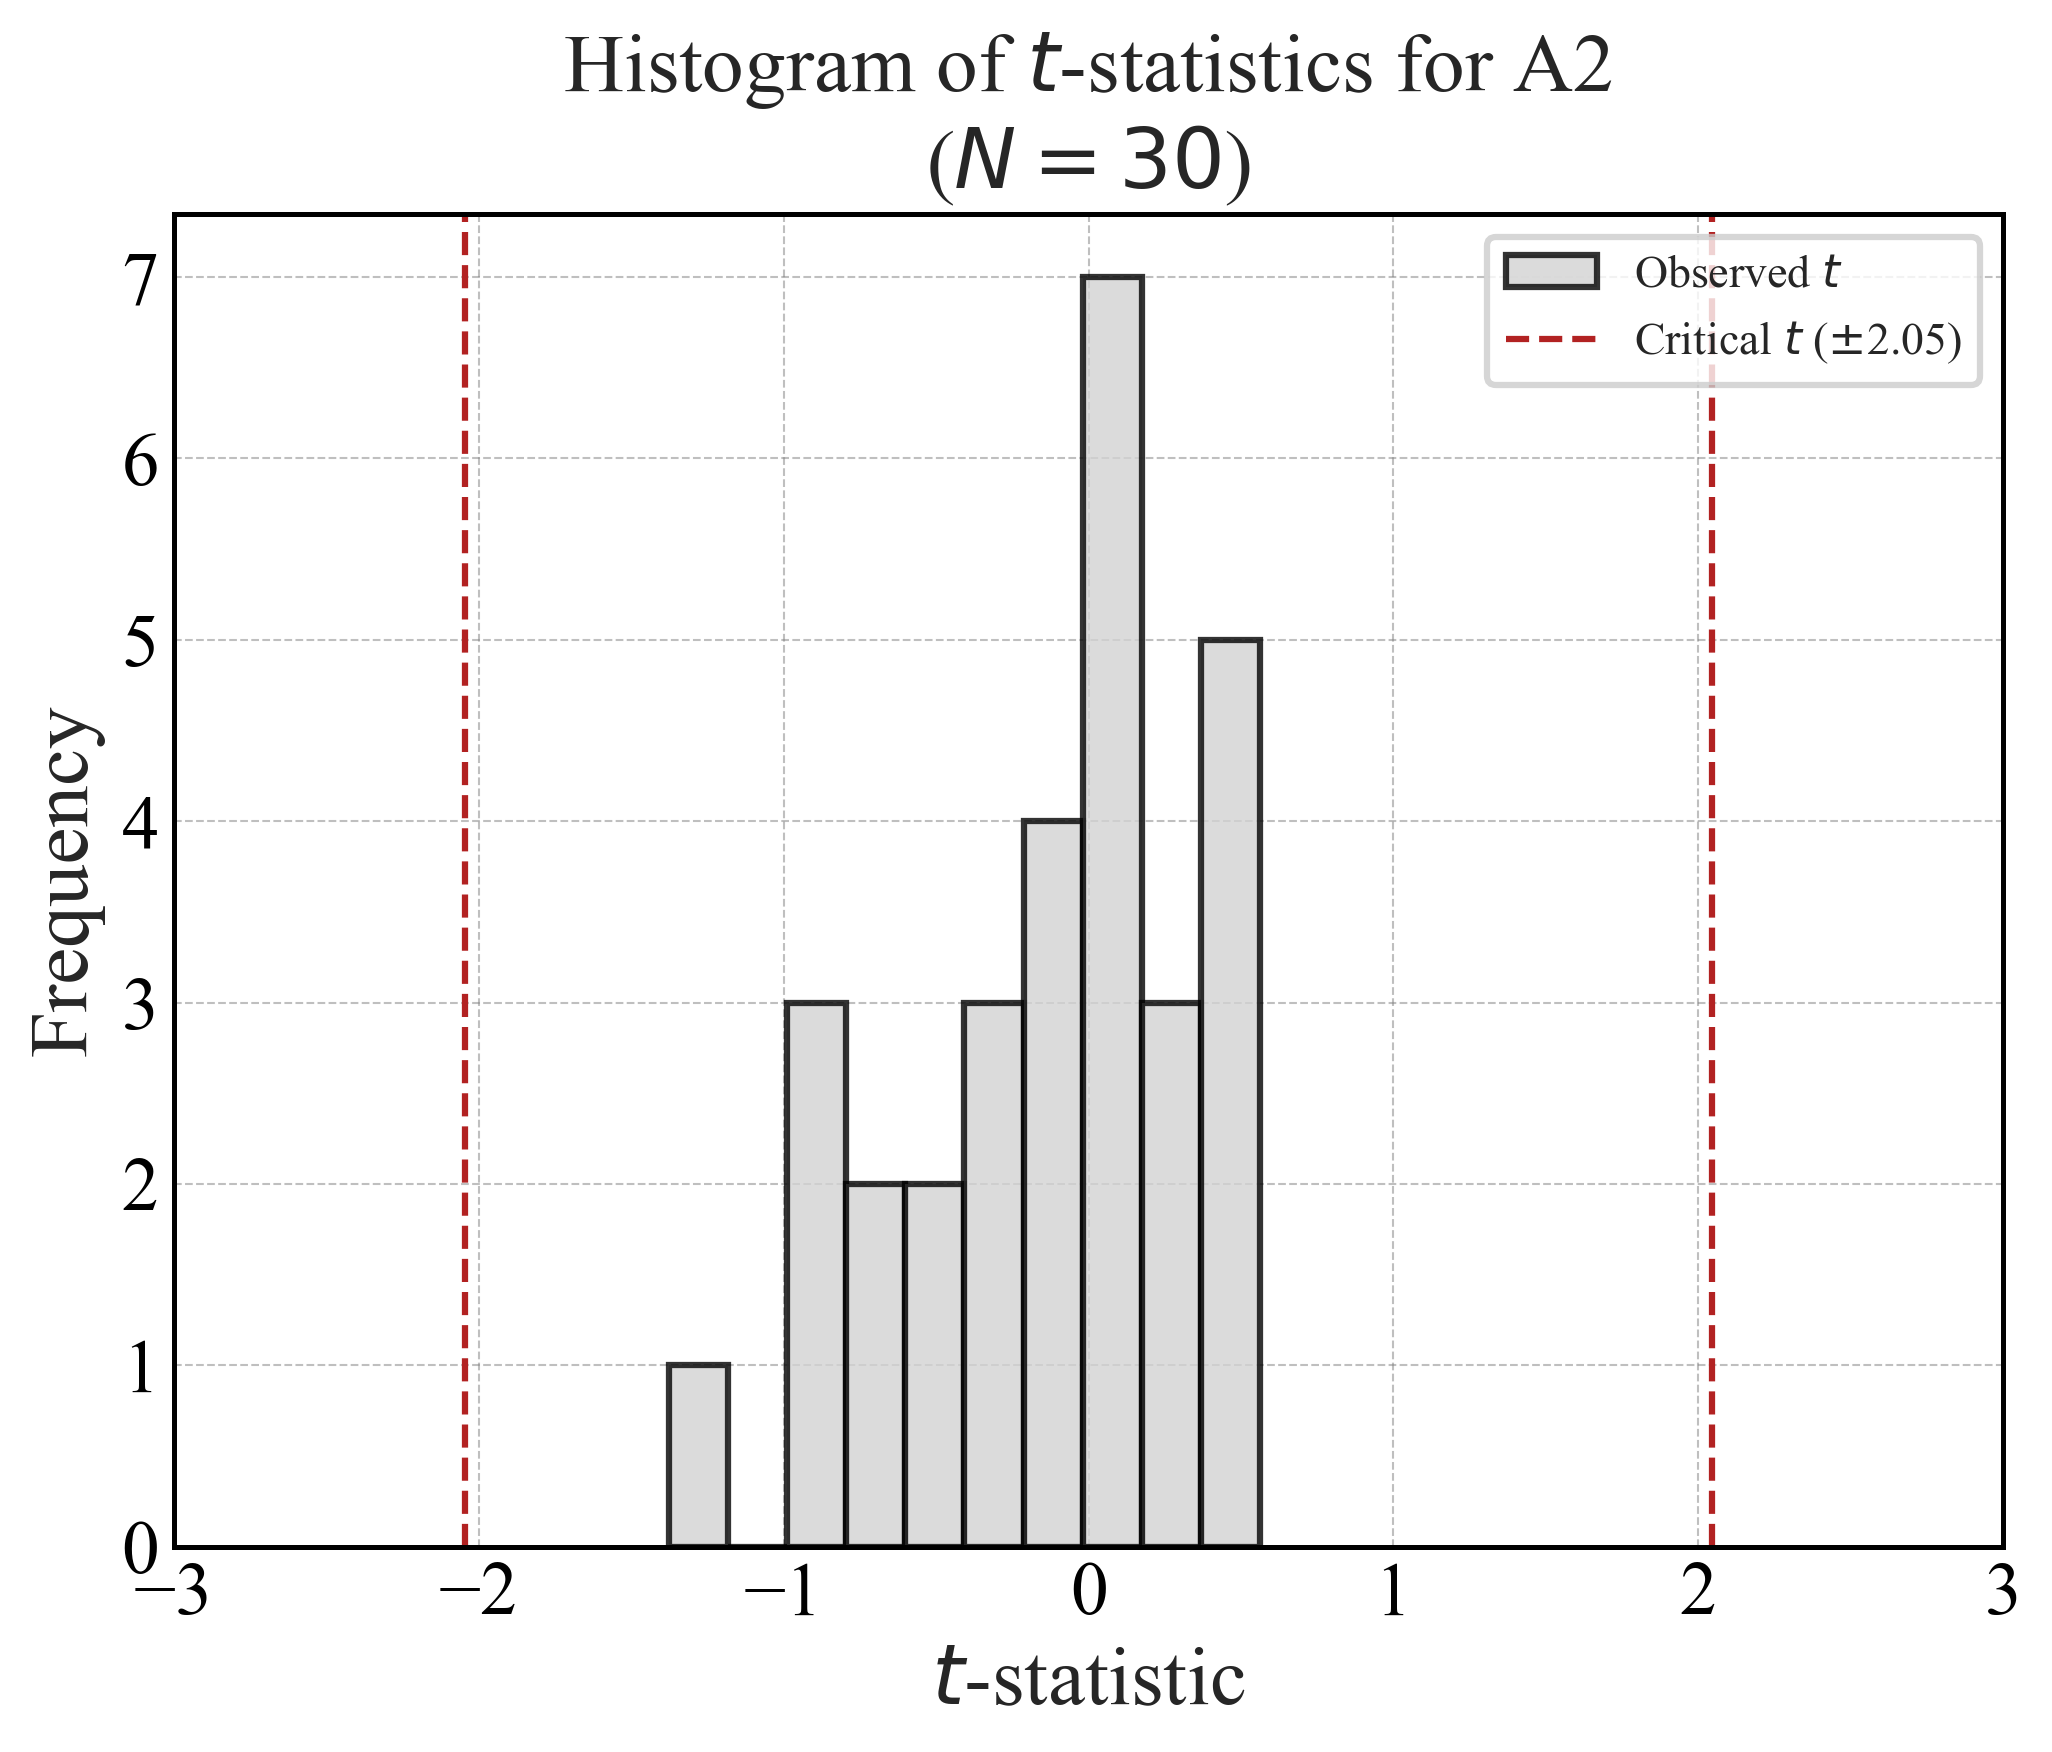

In [47]:
from scipy.stats import t

mpl.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "font.size": 12,
    "axes.labelsize": 20,
    "axes.titlesize": 20,
    "legend.fontsize": 11,
    "figure.dpi": 300,
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.alpha": 0.5,
})

j = 12
N_array = [15, 20, 30]
alpha = 0.05
mu = 6.6 * 12

for n in N_array:
    # อ่านข้อมูล
    try:
        test = pd.read_excel(f"../bootstrapping_data/summary_sheet/sampled_data_n={n}.xlsx", sheet_name="Summary")
    except Exception as e:
        print(f"Error loading file for n={n}: {e}")
        continue

    df = n - 1
    t_list = []
    
    # คำนวณ t-statistic
    for i in range(len(test)):
        X_bar = test['Mean_A2'][i]
        S = test['Std_A2'][i]
        t_stat = (X_bar - mu) / (S / np.sqrt(n))
        t_list.append(t_stat)
    
    t_critical = t.ppf(1 - alpha/2, df)

    # 2. สร้างพล็อตกราฟ (Frequency Style)
    fig, ax = plt.subplots(figsize=(7, 6))
    
    # วาด Histogram แบบ Frequency (ถอด density=True ออก)
    ax.hist(t_list, bins=10, edgecolor='black', color='lightgray', 
            alpha=0.8, label='Observed $t$')

    # 3. วาดเส้น Critical Values
    ax.axvline(t_critical, color='firebrick', linestyle='--', linewidth=1.5, 
               label=f'Critical $t$ ($\pm${t_critical:.2f})')
    ax.axvline(-t_critical, color='firebrick', linestyle='--', linewidth=1.5)

    # 4. การตกแต่ง Axes
    ax.set_title(f'Histogram of $t$-statistics for A2\n($N = {n}$)', fontweight='normal')
    ax.set_xlabel('$t$-statistic')
    ax.set_ylabel('Frequency')  # กลับมาใช้ Frequency
    
    # ปรับ xlim ตามที่คุณต้องการเดิม หรือจะใช้ [-4, 4] เพื่อความสวยงามก็ได้ครับ
    ax.set_xlim([-3, 3]) 
    ax.legend(loc='upper right')

    # ปรับแต่ง Ticks และขอบกราฟแบบ Inward
    ax.tick_params(direction='in', length=4, width=1, colors='black', labelsize=18)
    ax.minorticks_on()
    for spine in ax.spines.values():
        spine.set_linewidth(1.2)
        spine.set_visible(True)

    # ตั้งค่า Grid
    ax.grid(visible=True, which='major', color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

    # 5. บันทึกไฟล์ (ใช้ .png ตามต้นฉบับ หรือ .eps สำหรับงานพิมพ์)
    plt.tight_layout()
    plt.savefig(f'../sim_result/Fig{j}b.eps', format='eps', bbox_inches='tight')
    plt.show()
    
    j += 1

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


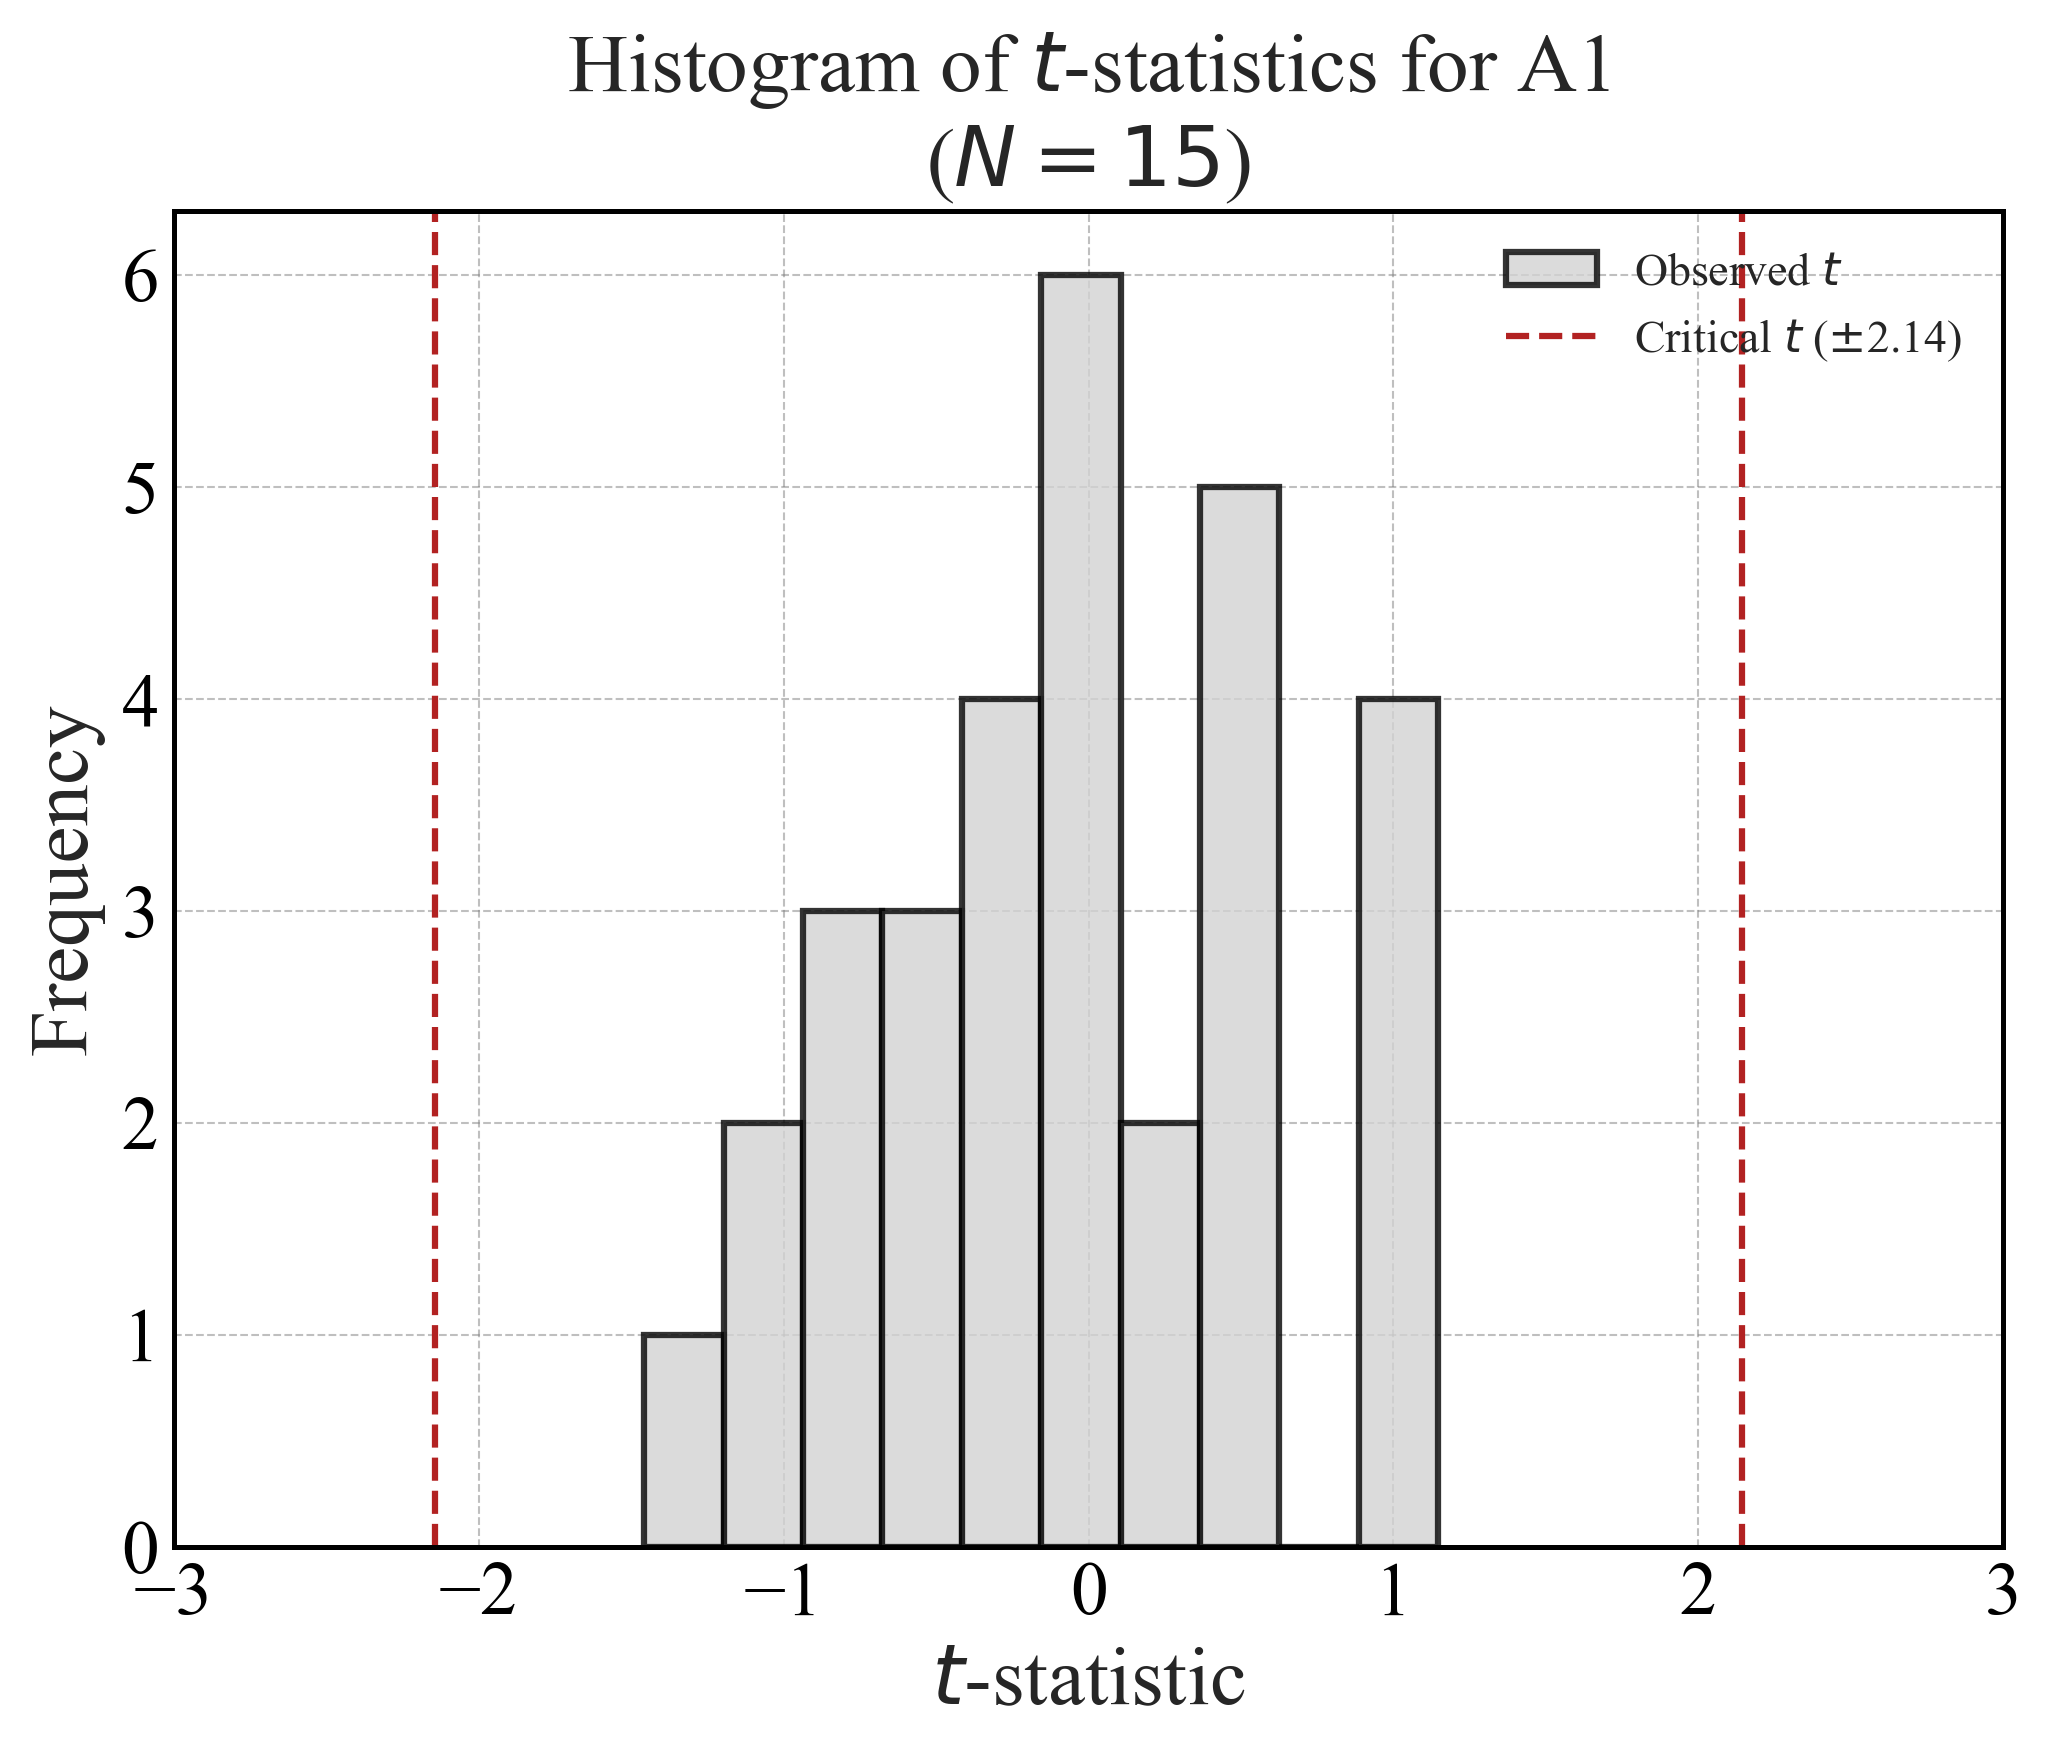

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


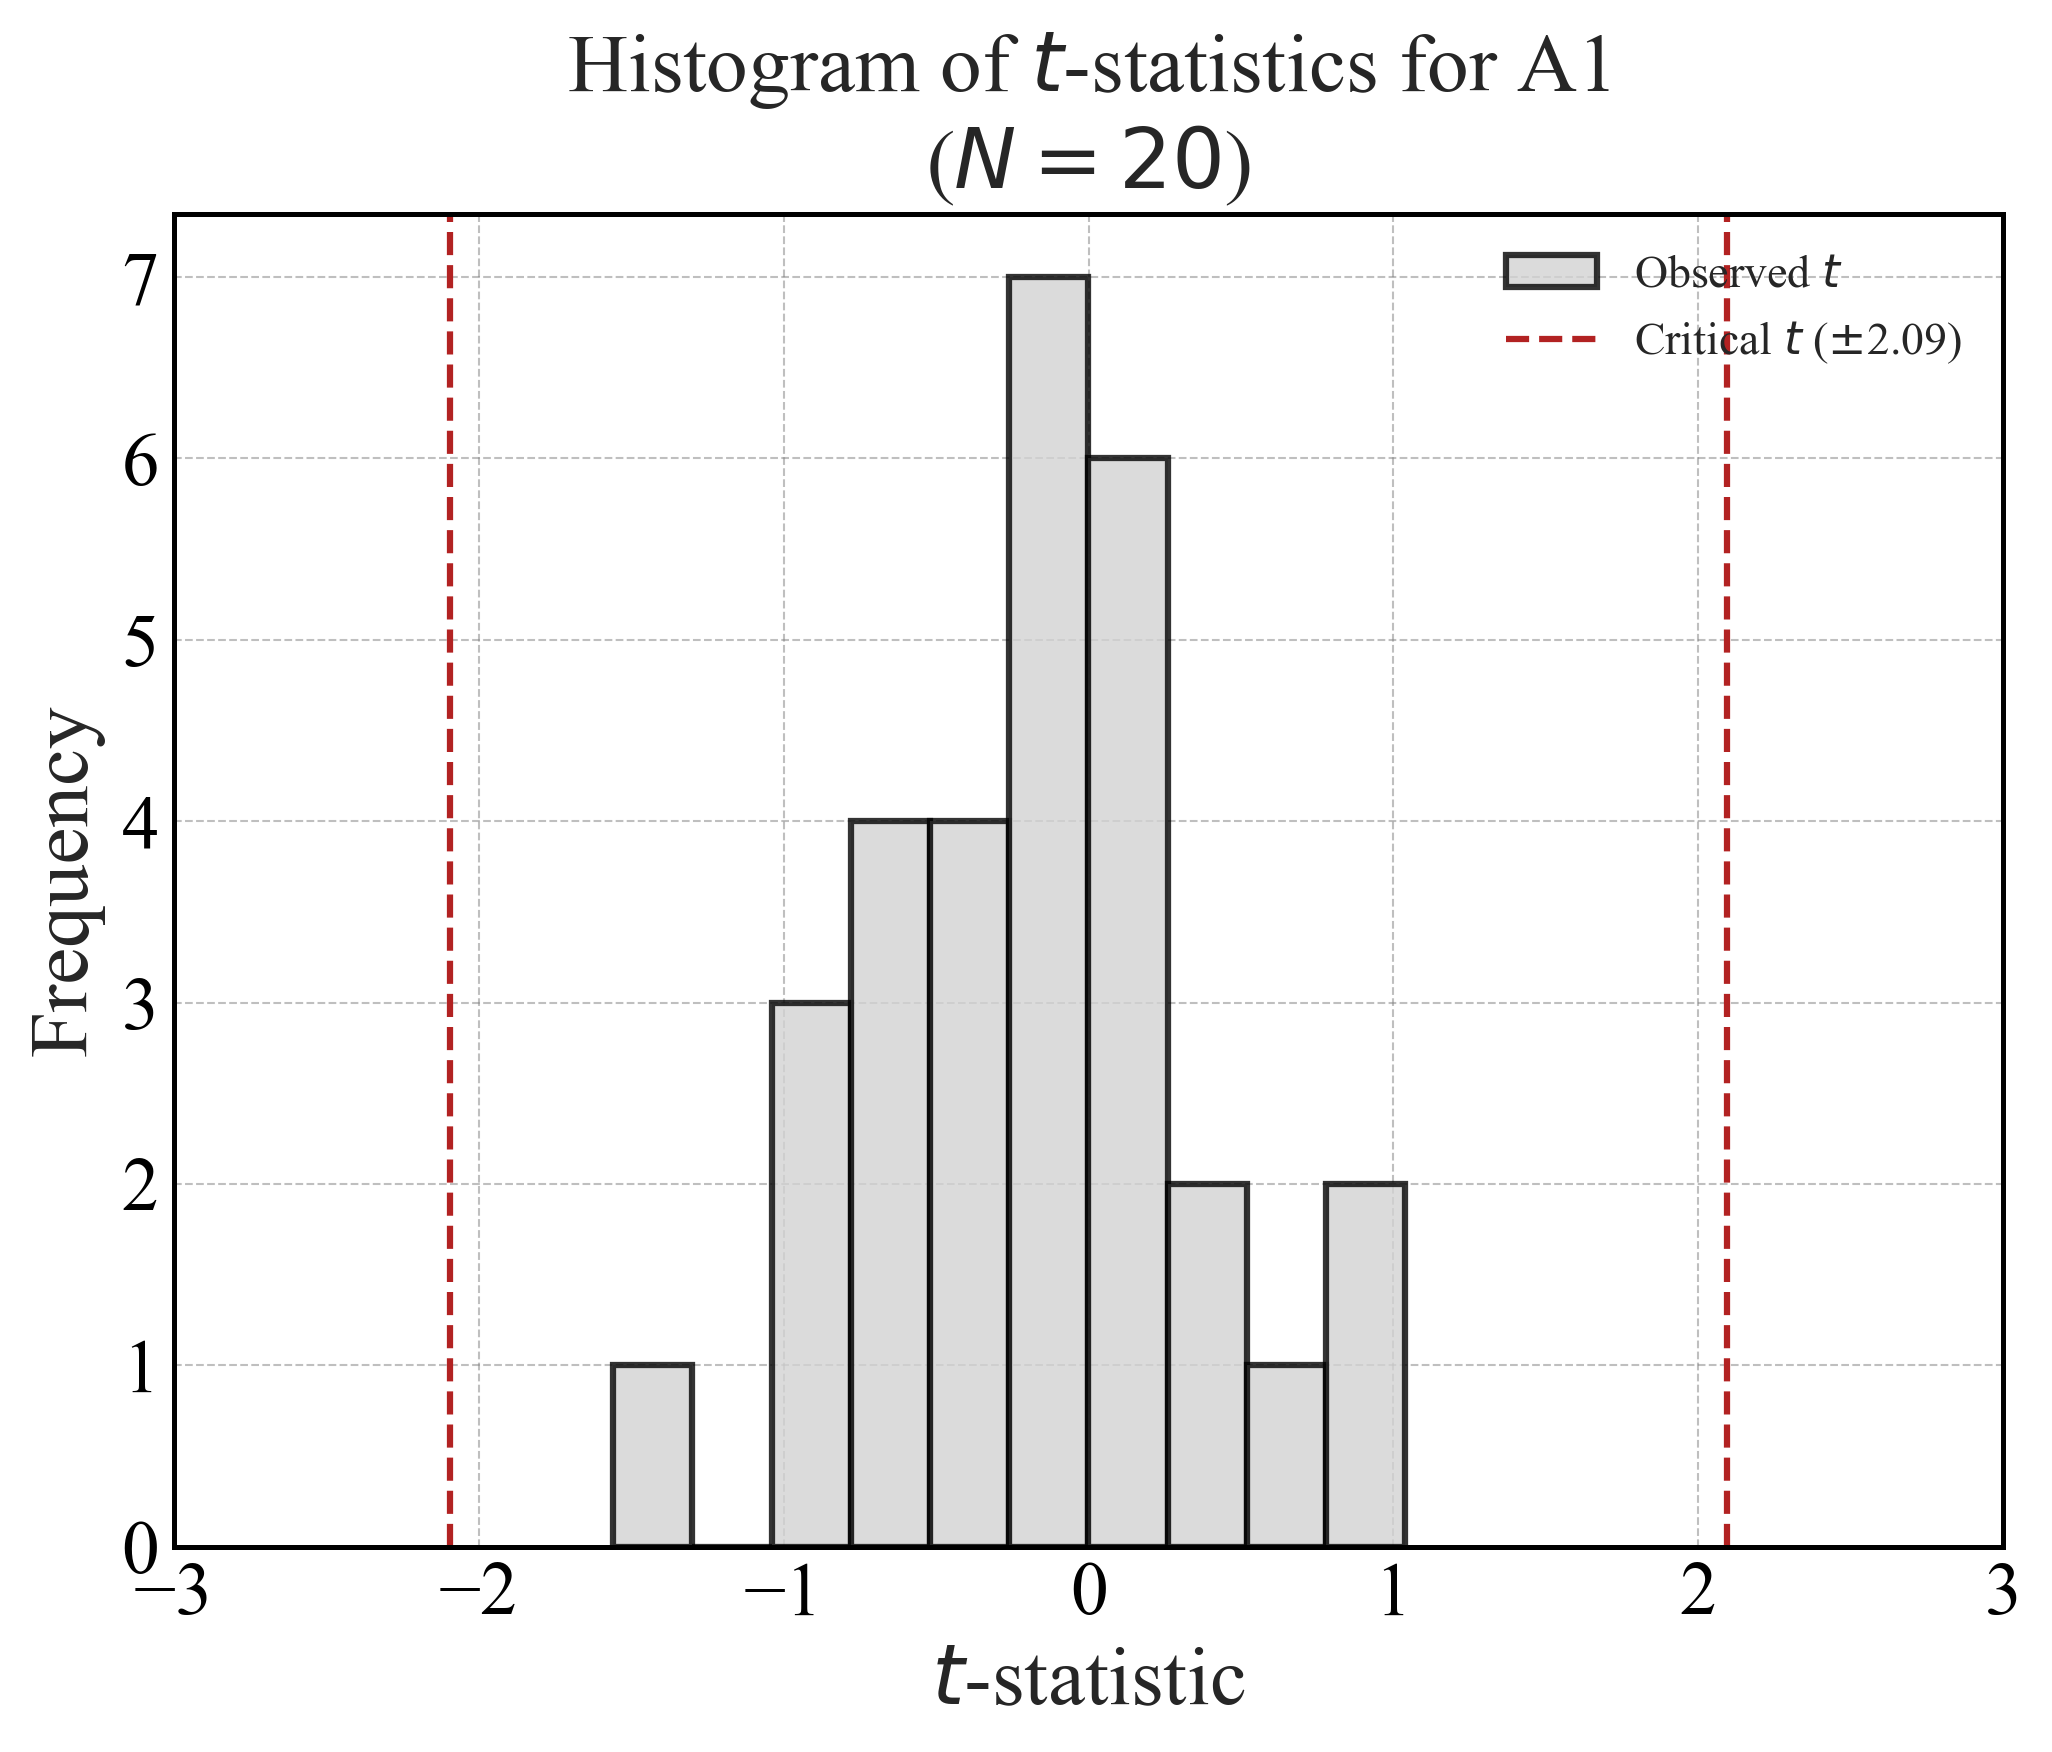

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


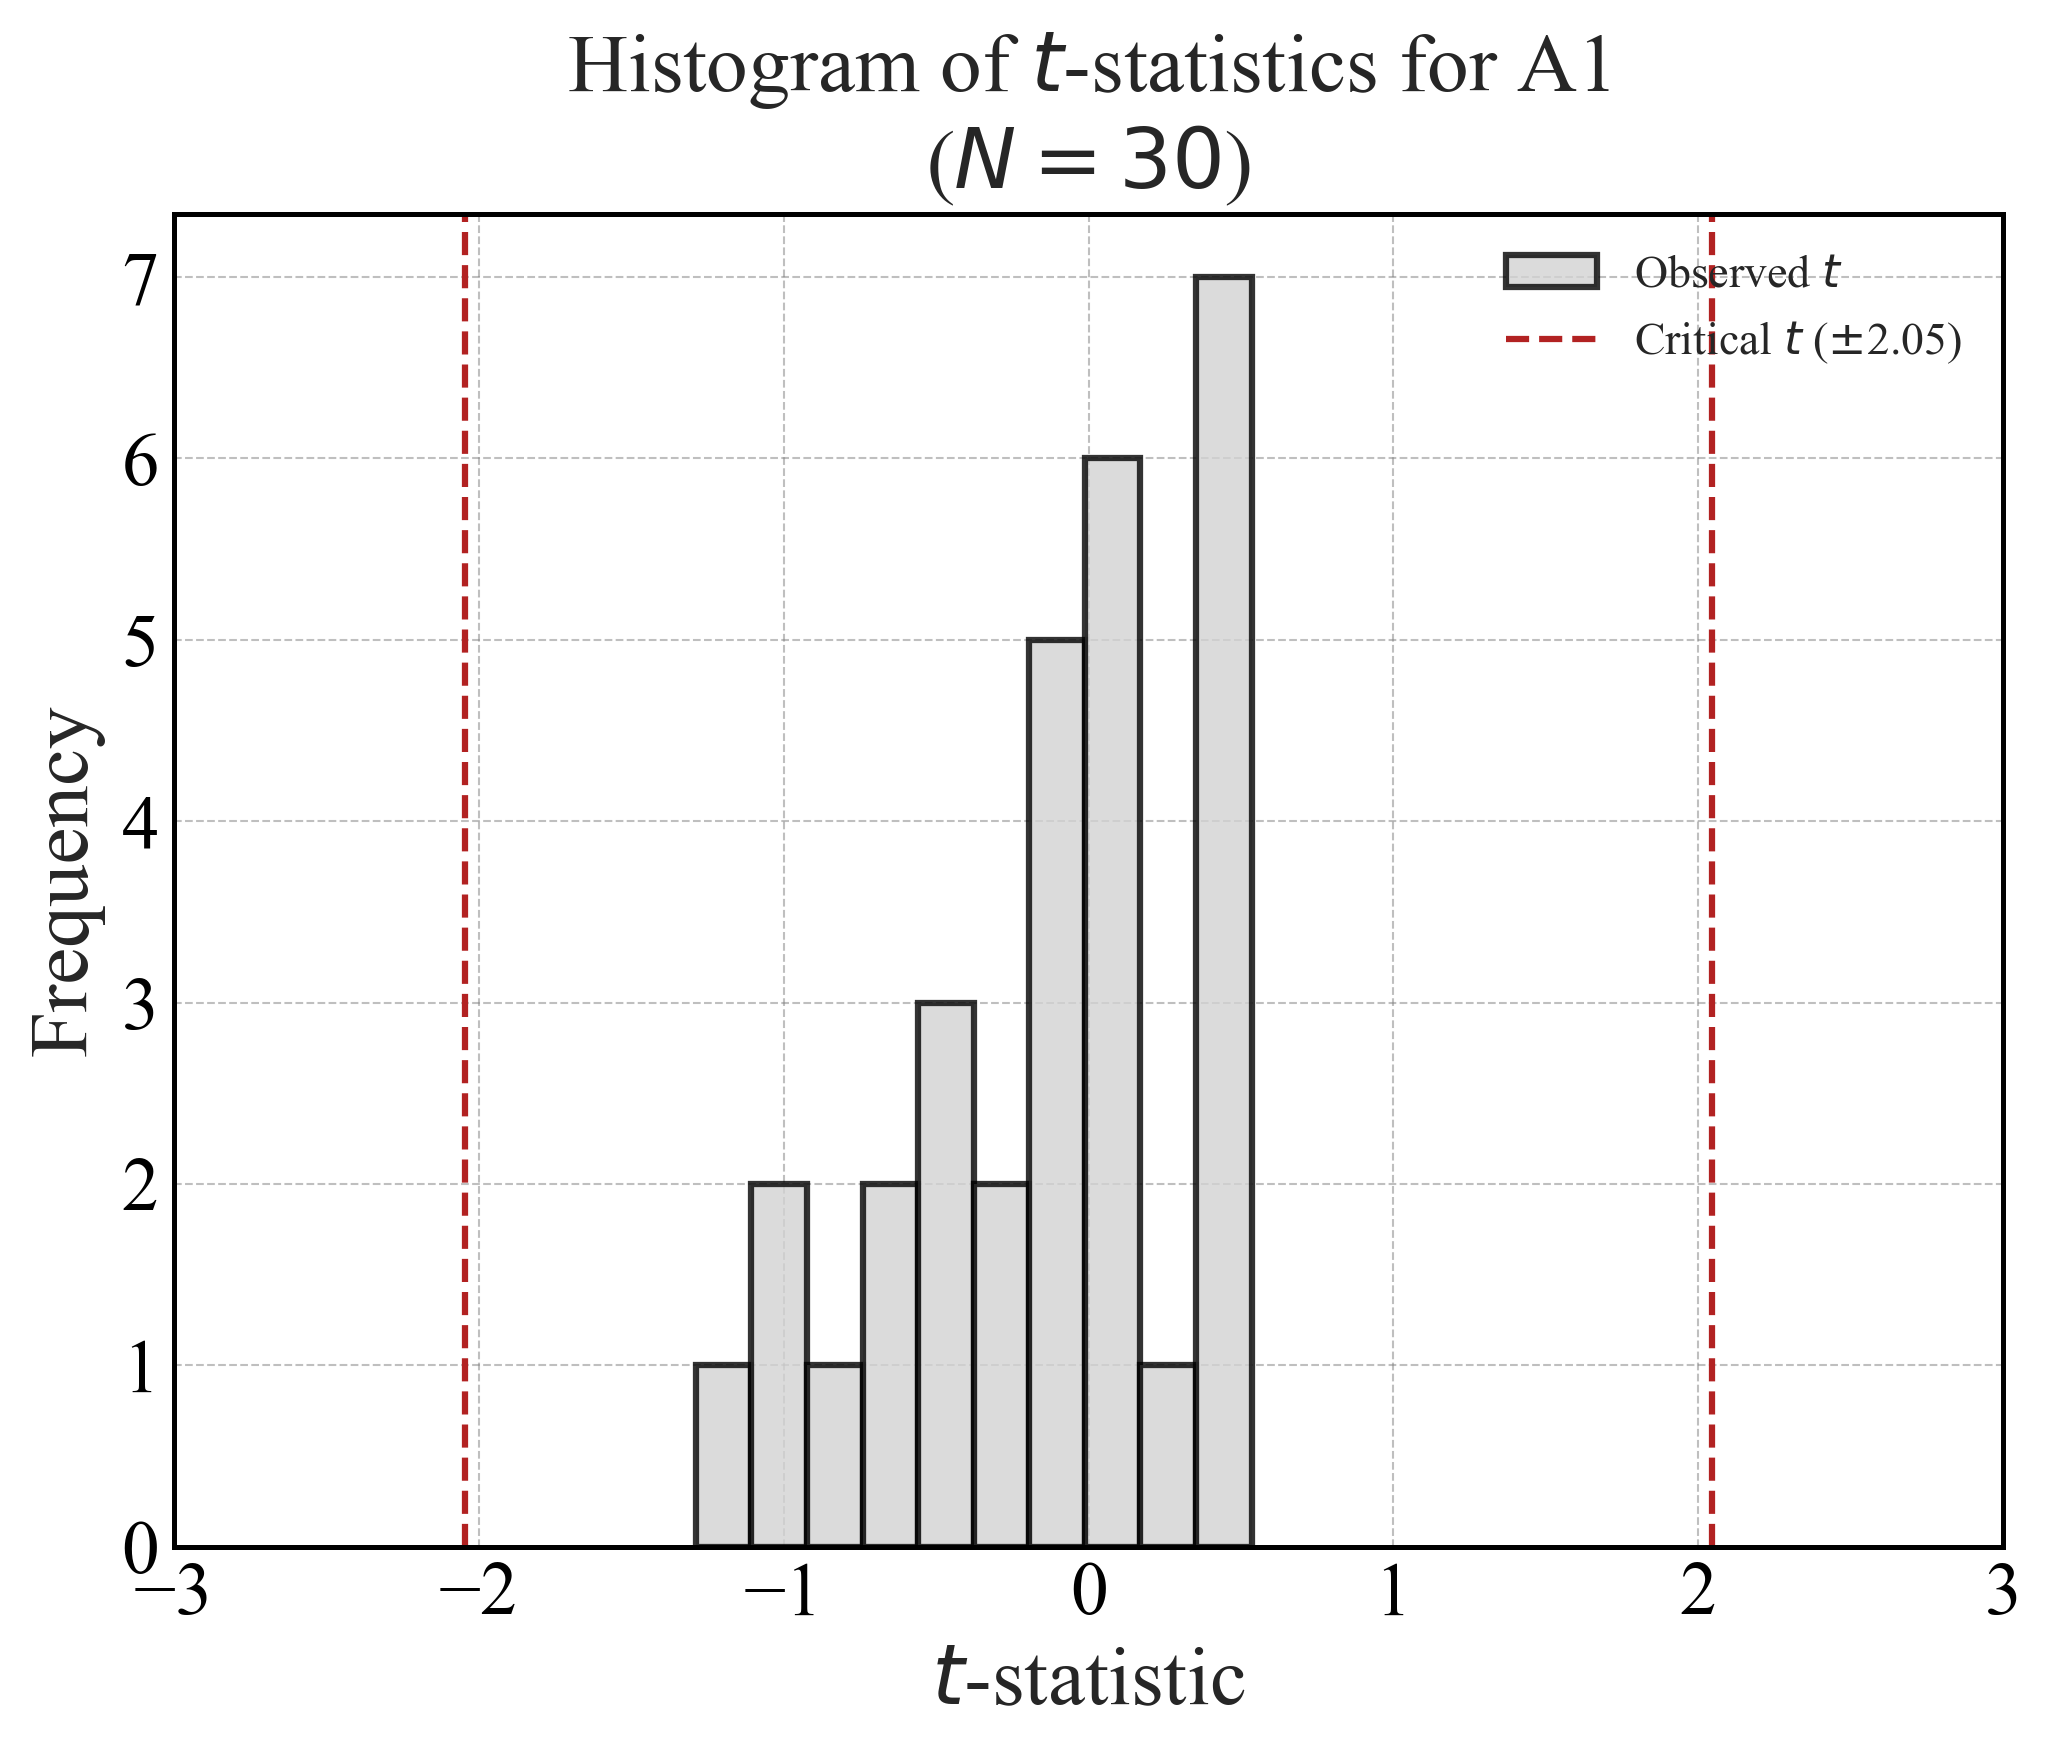

In [48]:
mpl.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "font.size": 12,
    "axes.labelsize": 20,
    "axes.titlesize": 20,
    "legend.fontsize": 11,
    "figure.dpi": 300,
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.alpha": 0.5,
})
j = 12
N_array = [15, 20, 30]
alpha = 0.05
mu = 6.6 * 12

for n in N_array:
    # อ่านข้อมูล
    try:
        test = pd.read_excel(f"../bootstrapping_data/summary_sheet/sampled_data_n={n}.xlsx", sheet_name="Summary")
    except Exception as e:
        print(f"Error loading file for n={n}: {e}")
        continue

    df = n - 1
    t_list = []
    
    # คำนวณ t-statistic
    for i in range(len(test)):
        X_bar = test['Mean_A1'][i]
        S = test['Std_A1'][i]
        t_stat = (X_bar - mu) / (S / np.sqrt(n))
        t_list.append(t_stat)
    
    t_critical = t.ppf(1 - alpha/2, df)

    # 2. สร้างพล็อตกราฟ (Frequency Style)
    fig, ax = plt.subplots(figsize=(7, 6))
    
    # วาด Histogram แบบ Frequency (ถอด density=True ออก)
    ax.hist(t_list, bins=10, edgecolor='black', color='lightgray', 
            alpha=0.8, label='Observed $t$')

    # 3. วาดเส้น Critical Values
    ax.axvline(t_critical, color='firebrick', linestyle='--', linewidth=1.5, 
               label=f'Critical $t$ ($\pm${t_critical:.2f})')
    ax.axvline(-t_critical, color='firebrick', linestyle='--', linewidth=1.5)

    # 4. การตกแต่ง Axes
    ax.set_title(f'Histogram of $t$-statistics for A1\n($N = {n}$)', fontweight='normal')
    ax.set_xlabel('$t$-statistic')
    ax.set_ylabel('Frequency')  # กลับมาใช้ Frequency
    
    # ปรับ xlim ตามที่คุณต้องการเดิม หรือจะใช้ [-4, 4] เพื่อความสวยงามก็ได้ครับ
    ax.set_xlim([-3, 3]) 
    ax.legend(frameon=False, loc='upper right')

    # ปรับแต่ง Ticks และขอบกราฟแบบ Inward
    ax.tick_params(direction='in', length=4, width=1, colors='black',labelsize=18)
    ax.minorticks_on()
    for spine in ax.spines.values():
        spine.set_linewidth(1.2)
        spine.set_visible(True)

    # ตั้งค่า Grid
    ax.grid(visible=True, which='major', color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

    plt.tight_layout()
    plt.savefig(f'../sim_result/Fig{j}a.eps', format='eps', bbox_inches='tight')
    plt.show()
    
    j += 1

## studentized_bootstrap_ci

In [80]:
def bootstrap_se(data, estimator, B):
    n = len(data)
    thetas = np.empty(B)
    for i in range(B):
        sample = np.random.choice(data, size=n, replace=True)
        thetas[i] = estimator(sample)

    return np.std(thetas, ddof=1)
def studentized_bootstrap_ci(data,theta,n,B,alpha,Area):
    theta_b_array = []
    t_b_array = []
    for b in range(B):
        sample = np.random.choice(data, size=n, replace=True)
        theta_b = np.mean(sample) #Obtain bootstrap replicate 

        theta_b_array.append(theta_b)
        se_b = bootstrap_se(sample, np.mean, B=200) # Estimate standard error b by bootstrapping the current bootstrap sample
        t_b = (theta_b - theta) / se_b # Calculate bootstrap t statistic
        t_b_array.append(t_b)

    se_theta = np.std(theta_b_array, ddof=1) # Calculate standard error hat based on the bootstrap replicates

    t_low = np.quantile(t_b_array, alpha / 2)
    t_high = np.quantile(t_b_array, 1 - alpha / 2)

    ci_lower = theta - t_high * se_theta
    ci_upper = theta - t_low * se_theta
    print(f"Bootstrap t Confidence Interval for Mean TTF of {Area} with n={n}: ({ci_lower:.4f}, {ci_upper:.4f})")
    return ci_lower, ci_upper

sample_15_A1 = studentized_bootstrap_ci(df['TTF of A1'].values, 6.6 * 12, 15, 40, 0.05,"A1")
sample_15_A2 = studentized_bootstrap_ci(df['TTF of A2'].values, 6.6 * 12, 15, 40, 0.05,"A2")

sample_20_A1 = studentized_bootstrap_ci(df['TTF of A1'].values, 6.6 * 12, 20, 40, 0.05,"A1")
sample_20_A2 = studentized_bootstrap_ci(df['TTF of A2'].values, 6.6 * 12, 20, 40, 0.05,"A2")

sample_30_A1 = studentized_bootstrap_ci(df['TTF of A1'].values, 6.6 * 12, 30, 40, 0.05,"A1")
sample_30_A2 = studentized_bootstrap_ci(df['TTF of A2'].values, 6.6 * 12, 30, 40, 0.05,"A2")

Bootstrap t Confidence Interval for Mean TTF of A1 with n=15: (66.7002, 85.0207)
Bootstrap t Confidence Interval for Mean TTF of A2 with n=15: (70.7164, 82.9005)
Bootstrap t Confidence Interval for Mean TTF of A1 with n=20: (70.7410, 82.9255)
Bootstrap t Confidence Interval for Mean TTF of A2 with n=20: (67.0791, 85.3895)
Bootstrap t Confidence Interval for Mean TTF of A1 with n=30: (68.0224, 84.7273)
Bootstrap t Confidence Interval for Mean TTF of A2 with n=30: (70.3658, 80.6322)


(64.2133012748351, 84.43998315653633)